In [ ]:
# !pip uninstall tidyzoning -y
# !pip install git+https://github.com/HOUPU1993/tidyzoning.git

Found existing installation: tidyzoning 0.1.0
Uninstalling tidyzoning-0.1.0:
  Successfully uninstalled tidyzoning-0.1.0
  Cloning https://github.com/HOUPU1993/tidyzoning.git to /private/var/folders/s5/1g0kvw1x37z1n8xgxcp8f3lh0000gn/T/pip-req-build-9gnetraz
  Running command git clone --filter=blob:none --quiet https://github.com/HOUPU1993/tidyzoning.git /private/var/folders/s5/1g0kvw1x37z1n8xgxcp8f3lh0000gn/T/pip-req-build-9gnetraz
  Resolved https://github.com/HOUPU1993/tidyzoning.git to commit 74fbd61e9f09cbadace6121bc83403481d0bd020
  Preparing metadata (setup.py) ... done
  Created wheel for tidyzoning: filename=tidyzoning-0.1.0-py3-none-any.whl size=55776 sha256=e72bd5a484df039cf86108c78b427c606f4ebabc800cf23a93e1f50e18859bfc
  Stored in directory: /private/var/folders/s5/1g0kvw1x37z1n8xgxcp8f3lh0000gn/T/pip-ephem-wheel-cache-be_h7zld/wheels/f4/29/51/e431eb95e0bf6589310375ce483daada9c916a6f65f3b65a8f
Successfully built tidyzoning


In [ ]:
# pip install pandas==2.1.4 geopandas==0.14.2

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

from shapely.geometry import Point
from shapely.geometry import box

from joblib import Parallel, delayed
from tqdm import tqdm

# input my libraries
from tidyzoning import find_district_idx
from tidyzoning import find_bldg_type
from tidyzoning import check_land_use
from tidyzoning import get_zoning_req
from tidyzoning import check_fl_area
from tidyzoning import check_far
from tidyzoning import check_height
from tidyzoning import check_stories
from tidyzoning import check_bedrooms
from tidyzoning import check_lot_coverage
from tidyzoning import check_unit_density
from tidyzoning import check_unit_qty
from tidyzoning import add_setbacks
from tidyzoning import get_buildable_area
from tidyzoning import zoning_analysis_pipeline
from tidyzoning import unify_tidybuilding
from tidyzoning import filter_constraints
from tidyzoning import check_zoning_process
from tidyzoning import parcels_in_zoning
from tidyzoning import parcel_in_confidence
from tidyzoning import parcel_in_nonconfidence
from tidyzoning import generate_parcel_info
from tidyzoning import check_height_eave

from tidyzoning.check_footprint import check_footprint
from tidyzoning.check_unit_size import check_unit_size

from tidyzoning import compare_id_differences

# Read files

## Read tidyzoning files

In [ ]:
# '''read the tidyzoning file'''

# # Set the directory path
# folder_path = r"C:\Users\Admin\Desktop\New folder (6)/final_ozfs_files"
# # Get all GeoJSON files
# geojson_files = [f for f in os.listdir(folder_path) if f.endswith('.geojson')]
# # Read and merge all GeoJSON files
# gdfs = [gpd.read_file(os.path.join(folder_path, file)) for file in geojson_files]
# tidyzoning = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))
# tidyzoning = tidyzoning.to_crs(3081)
# # Remove rows where geometry is None
# tidyzoning = tidyzoning[tidyzoning["geometry"].notnull()].reset_index(drop=True)
# tidyzoning

c:\Users\Admin\anaconda3\envs\houpu_py\lib\site-packages\geopandas\geoseries.py:766: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


dist_info  \
0     {'muni_name': 'Addison', 'county_name': 'Dalla...   
1     {'muni_name': 'Addison', 'county_name': 'Dalla...   
2     {'muni_name': 'Addison', 'county_name': 'Dalla...   
3     {'muni_name': 'Addison', 'county_name': 'Dalla...   
4     {'muni_name': 'Addison', 'county_name': 'Dalla...   
...                                                 ...   
2329  {'muni_name': 'Wylie', 'county_name': 'Collin'...   
2330  {'muni_name': 'Wylie', 'county_name': 'Collin'...   
2331  {'muni_name': 'Wylie', 'county_name': 'Collin'...   
2332  {'muni_name': 'Wylie', 'county_name': 'Collin'...   
2333  {'muni_name': 'Wylie', 'county_name': 'Collin'...   

                                        lot_constraints  \
0     {'lot_size': [{'unit': 'acres', 'use_name': '1...   
1     {'lot_size': [{'unit': 'acres', 'use_name': '1...   
2     {'lot_size': [{'unit': 'acres', 'use_name': ['...   
3                                                   [ ]   
4                                                   [ ]   
...                                                 ...   
2329                                                [ ]   
2330  {'lot_size': [{'unit': 'acres', 'use_name': 'P...   
2331                                                [ ]   
2332                                                [ ]   
2333                                                [ ]   

                                  structure_constraints  \
0     {'setback_front': [{'unit': 'feet', 'use_name'...   
1     {'setback_front': [{'unit': 'feet', 'use_name'...   
2     {'setback_front': [{'unit': 'feet', 'use_name'...   
3                                                   [ ]   
4                                                   [ ]   
...                                                 ...   
2329                                                [ ]   
2330                                                [ ]   
2331                                                [ ]   
2332  {'setback_front': [{'unit': 'feet', 'use_name'...   
2333                                                [ ]   

                                      other_constraints  \
0     {'parking_uncovered': [{'unit': 'stalls', 'use...   
1     {'parking_uncovered': [{'unit': 'stalls', 'use...   
2     {'parking_uncovered': [{'unit': 'stalls', 'use...   
3                                                   [ ]   
4                                                   [ ]   
...                                                 ...   
2329                                                [ ]   
2330                                                [ ]   
2331                                                [ ]   
2332  {'parking_uncovered': [{'unit': 'stalls', 'use...   
2333                                                [ ]   

                                               geometry  
0     MULTIPOLYGON (((1294967.914 1200750.641, 12949...  
1     MULTIPOLYGON (((1297547.674 1201294.009, 12975...  
2     MULTIPOLYGON (((1296265.904 1204277.845, 12962...  
3     MULTIPOLYGON (((1293588.425 1200210.412, 12935...  
4     MULTIPOLYGON (((1296113.011 1201367.053, 12961...  
...                                                 ...  
2329  MULTIPOLYGON (((1324810.563 1211332.974, 13248...  
2330  MULTIPOLYGON (((1325655.208 1205664.352, 13256...  
2331  POLYGON ((1322903.285 1210094.093, 1322863.375...  
2332  POLYGON ((1322934.521 1209226.711, 1322933.018...  
2333  MULTIPOLYGON (((1320577.163 1207894.754, 13203...  

[2334 rows x 5 columns]

In [2]:
tidyzoning_feeds = gpd.read_file(r"/Users/houpuli/Dropbox/ceshi/tidyzoning_3081_feeds.geojson")
tidyzoning_feeds = tidyzoning_feeds.to_crs(3081)
tidyzoning_feeds

dist_info  \
0     {'muni_name': 'Addison', 'county_name': 'Dalla...   
1     {'muni_name': 'Addison', 'county_name': 'Dalla...   
2     {'muni_name': 'Addison', 'county_name': 'Dalla...   
3     {'muni_name': 'Addison', 'county_name': 'Dalla...   
4     {'muni_name': 'Addison', 'county_name': 'Dalla...   
...                                                 ...   
2329  {'muni_name': 'Wylie', 'county_name': 'Collin'...   
2330  {'muni_name': 'Wylie', 'county_name': 'Collin'...   
2331  {'muni_name': 'Wylie', 'county_name': 'Collin'...   
2332  {'muni_name': 'Wylie', 'county_name': 'Collin'...   
2333  {'muni_name': 'Wylie', 'county_name': 'Collin'...   

                                        lot_constraints  \
0     {'lot_size': [{'unit': 'acres', 'use_name': '1...   
1     {'lot_size': [{'unit': 'acres', 'use_name': '1...   
2     {'lot_size': [{'unit': 'acres', 'use_name': ['...   
3                                                   [ ]   
4                                                   [ ]   
...                                                 ...   
2329                                                [ ]   
2330  {'lot_size': [{'unit': 'acres', 'use_name': 'P...   
2331                                                [ ]   
2332                                                [ ]   
2333                                                [ ]   

                                  structure_constraints  \
0     {'setback_front': [{'unit': 'feet', 'use_name'...   
1     {'setback_front': [{'unit': 'feet', 'use_name'...   
2     {'setback_front': [{'unit': 'feet', 'use_name'...   
3                                                   [ ]   
4                                                   [ ]   
...                                                 ...   
2329                                                [ ]   
2330                                                [ ]   
2331                                                [ ]   
2332  {'setback_front': [{'unit': 'feet', 'use_name'...   
2333                                                [ ]   

                                      other_constraints  \
0     {'parking_uncovered': [{'unit': 'stalls', 'use...   
1     {'parking_uncovered': [{'unit': 'stalls', 'use...   
2     {'parking_uncovered': [{'unit': 'stalls', 'use...   
3                                                   [ ]   
4                                                   [ ]   
...                                                 ...   
2329                                                [ ]   
2330                                                [ ]   
2331                                                [ ]   
2332  {'parking_uncovered': [{'unit': 'stalls', 'use...   
2333                                                [ ]   

                                               geometry  
0     MULTIPOLYGON (((1294967.914 1200750.641, 12949...  
1     MULTIPOLYGON (((1297547.674 1201294.009, 12975...  
2     MULTIPOLYGON (((1296265.904 1204277.845, 12962...  
3     MULTIPOLYGON (((1293588.425 1200210.412, 12935...  
4     MULTIPOLYGON (((1296113.011 1201367.053, 12961...  
...                                                 ...  
2329  MULTIPOLYGON (((1324810.563 1211332.974, 13248...  
2330  MULTIPOLYGON (((1325655.208 1205664.352, 13256...  
2331  POLYGON ((1322903.285 1210094.093, 1322863.375...  
2332  POLYGON ((1322934.521 1209226.711, 1322933.018...  
2333  MULTIPOLYGON (((1320577.163 1207894.754, 13203...  

[2334 rows x 5 columns]

In [ ]:
part_tidyzoning_3081 = gpd.read_file(r"/Users/houpuli/Dropbox/ceshi/25_test/part_tidyzoning_3081.geojson")
part_tidyzoning_3081

dist_info  \
0     {'muni_name': 'Addison', 'county_name': 'Dalla...   
1     {'muni_name': 'Addison', 'county_name': 'Dalla...   
2     {'muni_name': 'Addison', 'county_name': 'Dalla...   
3     {'muni_name': 'Addison', 'county_name': 'Dalla...   
4     {'muni_name': 'Addison', 'county_name': 'Dalla...   
...                                                 ...   
1768  {'muni_name': 'Wylie', 'county_name': 'Collin'...   
1769  {'muni_name': 'Wylie', 'county_name': 'Collin'...   
1770  {'muni_name': 'Wylie', 'county_name': 'Collin'...   
1771  {'muni_name': 'Wylie', 'county_name': 'Collin'...   
1772  {'muni_name': 'Wylie', 'county_name': 'Collin'...   

                                        lot_constraints  \
0     {'lot_size': [{'unit': 'acres', 'use_name': '1...   
1     {'lot_size': [{'unit': 'acres', 'use_name': '1...   
2     {'lot_size': [{'unit': 'acres', 'use_name': ['...   
3                                                   [ ]   
4                                                   [ ]   
...                                                 ...   
1768                                                [ ]   
1769  {'lot_size': [{'unit': 'acres', 'use_name': 'P...   
1770                                                [ ]   
1771                                                [ ]   
1772                                                [ ]   

                                  structure_constraints  \
0     {'setback_front': [{'unit': 'feet', 'use_name'...   
1     {'setback_front': [{'unit': 'feet', 'use_name'...   
2     {'setback_front': [{'unit': 'feet', 'use_name'...   
3                                                   [ ]   
4                                                   [ ]   
...                                                 ...   
1768                                                [ ]   
1769                                                [ ]   
1770                                                [ ]   
1771  {'setback_front': [{'unit': 'feet', 'use_name'...   
1772                                                [ ]   

                                      other_constraints  \
0     {'parking_uncovered': [{'unit': 'stalls', 'use...   
1     {'parking_uncovered': [{'unit': 'stalls', 'use...   
2     {'parking_uncovered': [{'unit': 'stalls', 'use...   
3                                                   [ ]   
4                                                   [ ]   
...                                                 ...   
1768                                                [ ]   
1769                                                [ ]   
1770                                                [ ]   
1771  {'parking_uncovered': [{'unit': 'stalls', 'use...   
1772                                                [ ]   

                                               geometry  
0     MULTIPOLYGON (((1294967.914 1200750.641, 12949...  
1     MULTIPOLYGON (((1297547.674 1201294.009, 12975...  
2     MULTIPOLYGON (((1296265.904 1204277.845, 12962...  
3     MULTIPOLYGON (((1293588.425 1200210.412, 12935...  
4     MULTIPOLYGON (((1296113.011 1201367.053, 12961...  
...                                                 ...  
1768  MULTIPOLYGON (((1324810.563 1211332.974, 13248...  
1769  MULTIPOLYGON (((1325655.208 1205664.352, 13256...  
1770  POLYGON ((1322903.285 1210094.093, 1322863.375...  
1771  POLYGON ((1322934.521 1209226.711, 1322933.018...  
1772  MULTIPOLYGON (((1320577.163 1207894.754, 13203...  

[1773 rows x 5 columns]

## Read tidyparcel files

In [ ]:
# import geopandas as gpd
# import os
# import pandas as pd

# # Use raw string for path to avoid escape sequence issues
# folder_path = r"C:\Users\Admin\Desktop\New folder (6)\tidyparcel_all_counties_raw"
# gdfs = []

# for filename in os.listdir(folder_path):
#     if filename.endswith(".geojson"):
#         file_path = os.path.join(folder_path, filename)
#         gdf = gpd.read_file(file_path)
        
#         source_name = os.path.splitext(filename)[0]
#         gdf["parcel_id"] = f"{source_name}_" + gdf["parcel_id"].astype(str)
        
#         gdfs.append(gdf)

# # Combine all GeoDataFrames
# combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# # Set CRS if you're sure; otherwise, better to check each file's CRS
# combined_gdf = combined_gdf.set_crs(epsg=4326, allow_override=True)

# # Save combined GeoDataFrame
# output_path = r"C:\Users\Admin\Desktop\New folder (6)\tidyparcel_all_counties_raw\combined_raw_parcels.geojson"
# combined_gdf.to_file(output_path, driver="GeoJSON")

In [ ]:
# output_path = r"C:\Users\Admin\Desktop\New folder (6)\tidyparcel_all_counties_raw\combined_raw_parcels.geojson"
# combined_gdf = gpd.read_file(output_path)
# combined_gdf

Prop_ID             GEO_ID                         parcel_id  \
0         2577028  R-8753-003-0250-1   Collin_County_combined_parcel_1   
1         2577028  R-8753-003-0250-1   Collin_County_combined_parcel_1   
2         2577028  R-8753-003-0250-1   Collin_County_combined_parcel_1   
3         2577028  R-8753-003-0250-1   Collin_County_combined_parcel_1   
4         2577028  R-8753-003-0250-1   Collin_County_combined_parcel_1   
...           ...                ...                               ...   
16114525   766738      R2747.0024.00  Wise_County_combined_parcel_9999   
16114526   766738      R2747.0024.00  Wise_County_combined_parcel_9999   
16114527   766738      R2747.0024.00  Wise_County_combined_parcel_9999   
16114528   766738      R2747.0024.00  Wise_County_combined_parcel_9999   
16114529   766738      R2747.0024.00  Wise_County_combined_parcel_9999   

                        parcel_addr landuse landuse_spec  \
0         1710   WHITE MOUNTAIN WAY       R           A1   
1         1710   WHITE MOUNTAIN WAY       R           A1   
2         1710   WHITE MOUNTAIN WAY       R           A1   
3         1710   WHITE MOUNTAIN WAY       R           A1   
4         1710   WHITE MOUNTAIN WAY       R           A1   
...                             ...     ...          ...   
16114525                 0  PR 1735     NaN          NaN   
16114526                 0  PR 1735     NaN          NaN   
16114527                 0  PR 1735     NaN          NaN   
16114528                 0  PR 1735     NaN          NaN   
16114529                 0  PR 1735     NaN          NaN   

                   parcel_label Found_Match  match_road_address  shape_index  \
0         regular inside parcel        True  White Mountain Way     1.209347   
1         regular inside parcel        True  White Mountain Way     1.209347   
2         regular inside parcel        True  White Mountain Way     1.209347   
3         regular inside parcel        True  White Mountain Way     1.209347   
4         regular inside parcel        True  White Mountain Way     1.209347   
...                         ...         ...                 ...          ...   
16114525     duplicated address        True         Pvt Rd 1735     1.363193   
16114526     duplicated address        True         Pvt Rd 1735     1.363193   
16114527     duplicated address        True         Pvt Rd 1735     1.363193   
16114528     duplicated address        True         Pvt Rd 1735     1.363193   
16114529     duplicated address        True         Pvt Rd 1735     1.363193   

          50_threshold  num_edges  angle_difference  shared_side  \
0                 True          4          8.265015         True   
1                 True          4          8.265015         True   
2                 True          4          8.265015         True   
3                 True          4          8.265015        False   
4                 True          4          8.265015        False   
...                ...        ...               ...          ...   
16114525          True          5          9.792967        False   
16114526          True          5          9.792967        False   
16114527          True          5          9.792967        False   
16114528          True          5          9.792967        False   
16114529          True          5          9.792967        False   

          parcel_bearing  road_bearing      angle  distance_to_road  \
0               1.964345      0.194206  78.578503         30.796944   
1               0.335557      0.194206   8.098818         52.090551   
2              -1.282980      0.194206  84.636517         33.260657   
3              -2.803135      0.194206   8.265015         12.015904   
4              -2.803135      0.194206   8.265015         12.015904   
...                  ...           ...        ...               ...   
16114525       -1.755471      3.122710  80.500838         57.145517   
16114526       -0.120689      3.122710   5.833096     

### Filtered Parcels in Zoning

In [ ]:
# output_fp = r"C:\Users\Admin\Desktop\New folder (6)\tidyparcel_filtered_all.geojson"

# # Create union of zoning geometries
# tidyzoning_union = tidyzoning.dissolve().unary_union
# tidyzoning_union = gpd.GeoDataFrame(geometry=[tidyzoning_union], crs=tidyzoning.crs)

# # Filter centroids and spatial join
# centroids = combined_gdf[combined_gdf['side'] == 'centroid']
# centroids_with_zoning = gpd.sjoin(centroids, tidyzoning_union, how='inner', predicate='within')

# # Get valid ids
# valid_ids = centroids_with_zoning[['Prop_ID', 'parcel_id']].drop_duplicates()

# # Filter tidyparcel using valid ids
# filtered = combined_gdf.merge(valid_ids, on=['Prop_ID', 'parcel_id'], how='inner')

# filtered.to_file(output_fp, driver='GeoJSON')

In [4]:
# filtered = gpd.read_file(r"/Users/houpuli/Dropbox/ceshi/tidyparcel_filtered_all_4326.geojson")
# filtered

### Generate Confidential & Non-Confidential dataset
- parcel with geomtry
- parcel with dimension

In [5]:
# non_confident_tidyparcel = parcel_in_nonconfidence(filtered)
# non_confident_tidyparcel.to_file(r"/Users/houpuli/Dropbox/ceshi/non_confident_tidyparcel_4326.geojson", driver='GeoJSON')
# non_confident_tidyparcel

In [6]:
# confident_tidyparcel = parcel_in_confidence(filtered)
# confident_tidyparcel.to_file(r"C:\Users\Admin\Desktop\New folder (6)\confident_tidyparcel_4326.geojson", driver='GeoJSON')
# confident_tidyparcel

In [ ]:
# tidyparcel = generate_parcel_info(confident_tidyparcel, tidyzoning)
# tidyparcel.to_csv(r"C:\Users\Admin\Desktop\New folder (6)\tidyparcel.csv", index=False)
# tidyparcel

## Read tidyparcel

In [3]:
tidyparcel_geo = gpd.read_file(r"/Users/houpuli/Dropbox/ceshi/tidyparcel_filtered_all_4326.geojson")
tidyparcel_geo = tidyparcel_geo.to_crs(3081)
tidyparcel_geo

Prop_ID             GEO_ID                        parcel_id  \
0         2577028  R-8753-003-0250-1  Collin_County_combined_parcel_1   
1         2577028  R-8753-003-0250-1  Collin_County_combined_parcel_1   
2         2577028  R-8753-003-0250-1  Collin_County_combined_parcel_1   
3         2577028  R-8753-003-0250-1  Collin_County_combined_parcel_1   
4         2577028  R-8753-003-0250-1  Collin_County_combined_parcel_1   
...           ...                ...                              ...   
10897443   775842      R0447.0515.00  Wise_County_combined_parcel_999   
10897444   775842      R0447.0515.00  Wise_County_combined_parcel_999   
10897445   775842      R0447.0515.00  Wise_County_combined_parcel_999   
10897446   775842      R0447.0515.00  Wise_County_combined_parcel_999   
10897447   775842      R0447.0515.00  Wise_County_combined_parcel_999   

                        parcel_addr landuse landuse_spec  \
0         1710   WHITE MOUNTAIN WAY       R           A1   
1         1710   WHITE MOUNTAIN WAY       R           A1   
2         1710   WHITE MOUNTAIN WAY       R           A1   
3         1710   WHITE MOUNTAIN WAY       R           A1   
4         1710   WHITE MOUNTAIN WAY       R           A1   
...                             ...     ...          ...   
10897443          232  KINGS WAY CT     NaN          NaN   
10897444          232  KINGS WAY CT     NaN          NaN   
10897445          232  KINGS WAY CT     NaN          NaN   
10897446          232  KINGS WAY CT     NaN          NaN   
10897447          232  KINGS WAY CT     NaN          NaN   

                     parcel_label Found_Match  match_road_address  \
0           regular inside parcel        True  White Mountain Way   
1           regular inside parcel        True  White Mountain Way   
2           regular inside parcel        True  White Mountain Way   
3           regular inside parcel        True  White Mountain Way   
4           regular inside parcel        True  White Mountain Way   
...                           ...         ...                 ...   
10897443  cul_de_sac parcel_other        True         Kingsway Ct   
10897444  cul_de_sac parcel_other        True         Kingsway Ct   
10897445  cul_de_sac parcel_other        True         Kingsway Ct   
10897446  cul_de_sac parcel_other        True         Kingsway Ct   
10897447  cul_de_sac parcel_other        True         Kingsway Ct   

          shape_index  50_threshold  num_edges  angle_difference  shared_side  \
0            1.209347          True          4          8.265015         True   
1            1.209347          True          4          8.265015         True   
2            1.209347          True          4          8.265015         True   
3            1.209347          True          4          8.265015        False   
4            1.209347          True          4          8.265015        False   
...               ...           ...        ...               ...          ...   
10897443     1.135031         False          5         25.188649        False   
10897444     1.135031         False          5         25.188649        False   
10897445     1.135031         False          5         25.188649        False   
10897446     1.135031         False          5         25.188649        False   
10897447     1.135031         False          5         25.188649        False   

          parcel_bearing  road_bearing      angle  distance_to_road  \
0               1.964345      0.194206  78.578503         30.796944   
1               0.335557      0.194206   8.098818         52.090551   
2              -1.282980      0.194206  84.636517         33.260657   
3              -2.803135      0.194206   8.265015         12.015904   
4              -2.803135      0.194206   8.265015         12.015904   
...                  ...           ...        ...               ...   
10897443        1.837385     -1.011676  16.760853         61.732947   
10897444        0.652263     -1.011676  84

In [4]:
tidyparcel_dim = pd.read_csv(r"/Users/houpuli/Dropbox/ceshi/tidyparcel_dim_feeds.csv")
tidyparcel_dim

/var/folders/s5/1g0kvw1x37z1n8xgxcp8f3lh0000gn/T/ipykernel_2702/2783107644.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tidyparcel_dim = pd.read_csv(r"/Users/houpuli/Dropbox/ceshi/tidyparcel_dim_feeds.csv")


Prop_ID                             parcel_id  \
0         2014793  Collin_County_combined_parcel_107881   
1         2552176  Collin_County_combined_parcel_110249   
2         2608218  Collin_County_combined_parcel_116443   
3         2601984  Collin_County_combined_parcel_117300   
4         2004997  Collin_County_combined_parcel_121714   
...           ...                                   ...   
2019237  775825.0       Wise_County_combined_parcel_990   
2019238  775849.0       Wise_County_combined_parcel_993   
2019239  775848.0       Wise_County_combined_parcel_994   
2019240  768988.0      Wise_County_combined_parcel_9945   
2019241  768605.0      Wise_County_combined_parcel_9946   

                    Parcel_label   lot_width   lot_depth  lot_area  zoning_id  \
0        cul_de_sac parcel_other    1.000000    1.000000  0.200288         33   
1             curve parcel_other    1.000000    1.000000  0.726828       2330   
2           special parcel_other    1.000000    1.000000  0.984305       1596   
3        cul_de_sac parcel_other    1.000000    1.000000  0.328364       2007   
4        cul_de_sac parcel_other    1.000000    1.000000  0.130074        542   
...                          ...         ...         ...       ...        ...   
2019237    curve parcel_standard   99.733862  136.543858  0.202982       1929   
2019238  special parcel_standard  165.892068  101.502553  0.294313       1929   
2019239  special parcel_standard  164.751366   80.351787  0.272766       1929   
2019240    regular corner parcel   89.828738   80.043009  0.164798        264   
2019241    regular corner parcel  148.314337  380.304447  0.997401         83   

                    confidence  
0        non_confidence_parcel  
1        non_confidence_parcel  
2        non_confidence_parcel  
3        non_confidence_parcel  
4        non_confidence_parcel  
...                        ...  
2019237      confidence_parcel  
2019238      confidence_parcel  
2019239      confidence_parcel  
2019240      confidence_parcel  
2019241      confidence_parcel  

[2019242 rows x 8 columns]

In [ ]:
confident_tidyparcel_3081 = gpd.read_file(r"/Users/houpuli/Dropbox/ceshi/25_test/confident_tidyparcel_25.geojson")
confident_tidyparcel_3081

Prop_ID              GEO_ID                            parcel_id  \
0        2747493  R-11137-00A-0150-1  Collin_County_combined_parcel_10000   
1        2747493  R-11137-00A-0150-1  Collin_County_combined_parcel_10000   
2        2747493  R-11137-00A-0150-1  Collin_County_combined_parcel_10000   
3        2747493  R-11137-00A-0150-1  Collin_County_combined_parcel_10000   
4        2747493  R-11137-00A-0150-1  Collin_County_combined_parcel_10000   
...          ...                 ...                                  ...   
1744427   768605       S0060.0663.00     Wise_County_combined_parcel_9946   
1744428   768605       S0060.0663.00     Wise_County_combined_parcel_9946   
1744429   768605       S0060.0663.00     Wise_County_combined_parcel_9946   
1744430   768605       S0060.0663.00     Wise_County_combined_parcel_9946   
1744431   768605       S0060.0663.00     Wise_County_combined_parcel_9946   

                 parcel_addr landuse landuse_spec           parcel_label  \
0        8816   ABBINGTON PL       R           A1  regular inside parcel   
1        8816   ABBINGTON PL       R           A1  regular inside parcel   
2        8816   ABBINGTON PL       R           A1  regular inside parcel   
3        8816   ABBINGTON PL       R           A1  regular inside parcel   
4        8816   ABBINGTON PL       R           A1  regular inside parcel   
...                      ...     ...          ...                    ...   
1744427     616 S WICKHAM ST     NaN          NaN  regular corner parcel   
1744428     616 S WICKHAM ST     NaN          NaN  regular corner parcel   
1744429     616 S WICKHAM ST     NaN          NaN  regular corner parcel   
1744430     616 S WICKHAM ST     NaN          NaN  regular corner parcel   
1744431     616 S WICKHAM ST     NaN          NaN  regular corner parcel   

        Found_Match match_road_address  shape_index  50_threshold  num_edges  \
0              True       Abbington Pl     1.284231          True          4   
1              True       Abbington Pl     1.284231          True          4   
2              True       Abbington Pl     1.284231          True          4   
3              True       Abbington Pl     1.284231          True          4   
4              True       Abbington Pl     1.284231          True          4   
...             ...                ...          ...           ...        ...   
1744427        True         Wickham St     1.296870          True          4   
1744428        True         Wickham St     1.296870          True          4   
1744429        True         Wickham St     1.296870          True          4   
1744430        True         Wickham St     1.296870          True          4   
1744431        True         Wickham St     1.296870          True          4   

         angle_difference  shared_side  parcel_bearing  road_bearing  \
0                0.201639         True       -1.571972     -0.006727   
1                0.201639         True       -0.003207     -0.006727   
2                0.201639         True        1.569623     -0.006727   
3                0.201639        False        3.138385     -0.006727   
4                0.201639        False        3.138385     -0.006727   
...                   ...          ...             ...           ...   
1744427          0.349634        False        3.136105      1.559195   
1744428          0.349634        False       -1.576295      1.559195   
1744429          0.349634        False        1.025032      1.559195   
1744430          0.349634        False       -0.005499      1.559195   
1744431          0.349634        False       -0.005499      1.559195   

             angle  distance_to_road           side  \
0        89.681925         36.761265  Interior side   
1         0.201640         62.382758           rear   
2        89.681813         36.697407  Interior side   
3         0.201639         11.075914          front   
4         0.201639         11.075914       centroid   
...            

In [ ]:
tidyparcel_3081 = pd.read_csv(r"/Users/houpuli/Dropbox/ceshi/25_test/tidyparcel_25_3081.csv")
tidyparcel_3081

/var/folders/s5/1g0kvw1x37z1n8xgxcp8f3lh0000gn/T/ipykernel_21411/2359772845.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tidyparcel_3081 = pd.read_csv(r"/Users/houpuli/Dropbox/ceshi/25_test/tidyparcel_25_3081.csv")


Prop_ID                             parcel_id  \
0        2747493   Collin_County_combined_parcel_10000   
1        2702267  Collin_County_combined_parcel_100028   
2        2082442  Collin_County_combined_parcel_100030   
3        2129279  Collin_County_combined_parcel_100049   
4        1262715  Collin_County_combined_parcel_100067   
...          ...                                   ...   
345345  783763.0      Wise_County_combined_parcel_9058   
345346  783634.0      Wise_County_combined_parcel_9195   
345347  755021.0      Wise_County_combined_parcel_9452   
345348  753256.0      Wise_County_combined_parcel_9590   
345349  768605.0      Wise_County_combined_parcel_9946   

                   Parcel_label   lot_width   lot_depth  lot_area  zoning_id  \
0         regular inside parcel   49.798850  140.149905  0.160223       1318   
1       special parcel_standard   92.356753  155.462562  0.330331       1462   
2         regular inside parcel   75.976481  153.355275  0.257746       1318   
3         regular inside parcel   88.756216  120.637375  0.244816       1451   
4         regular corner parcel   72.942981  115.924629  0.194107        412   
...                         ...         ...         ...       ...        ...   
345345    regular inside parcel  222.048276  282.727141  1.119235         66   
345346  special parcel_standard  273.157571  178.421926  0.973641        169   
345347    regular corner parcel   74.896580  139.806812  0.240382        171   
345348    regular corner parcel  104.859746  149.799612  0.360605        270   
345349    regular corner parcel  148.314337  380.304447  0.997401         22   

               confidence  
0       confidence_parcel  
1       confidence_parcel  
2       confidence_parcel  
3       confidence_parcel  
4       confidence_parcel  
...                   ...  
345345  confidence_parcel  
345346  confidence_parcel  
345347  confidence_parcel  
345348  confidence_parcel  
345349  confidence_parcel  

[345350 rows x 8 columns]

### Generate the tidyparcel info datasets

In [ ]:
# import math
# import pandas as pd
# import geopandas as gpd
# from shapely.geometry import box, LineString
# from shapely.ops import unary_union, polygonize
# from shapely.affinity import rotate

# '''present the original & rotated rectangle with different colors'''
# rect = box(-5, -2, 5, 2)  # width=10, height=4
# rotated_rect = rotate(rect, 30, origin='centroid', use_radians=False)
# coords = list(rotated_rect.exterior.coords)

# # Define sides
# exterior = LineString([coords[0], coords[1]])        
# front = LineString([coords[1], coords[2]])    
# interior = LineString([coords[2], coords[3]])       
# rear = LineString([coords[3], coords[0]])    

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# x, y = rect.exterior.xy
# ax.plot(x, y, color="black", label="Rectangle")

# # Plot each side with a different color
# for name, side, color in [
#     ("rear", rear, "blue"),
#     ("exterior", exterior, "red"),
#     ("front", front, "green"),
#     ("interior", interior, "orange")
# ]:
#     sx, sy = side.xy
#     ax.plot(sx, sy, color=color, linewidth=3, label=name)

# ax.set_aspect("equal")
# ax.legend()
# plt.title("Labeled Sides of Rectangle")
# plt.show()



# '''calculated the angle of rotation'''
# front_centroid = front.centroid
# rear_centroid = rear.centroid

# dx = rear_centroid.x - front_centroid.x
# dy = rear_centroid.y - front_centroid.y

# angle = math.degrees(math.atan2(dy, dx))
# angle



# '''prensent the adjusted rectangular'''
# corrected_rect = rotate(rotated_rect, -angle, origin='centroid', use_radians=False)

# fig, ax = plt.subplots()

# # Original tilted one
# x, y = rotated_rect.exterior.xy
# ax.plot(x, y, label="Rotated (+30°)", color="red")

# # After correction
# x, y = corrected_rect.exterior.xy
# ax.plot(x, y, label="Corrected (Aligned)", color="green")

# ax.axis("equal")
# ax.legend()
# plt.title("Geometry Aligned with Horizontal Axis")
# plt.show()


## Read the tidybuilding file

In [5]:
file_path = r"/Users/houpuli/Dropbox/ceshi/tidybuilding/4_fam_wide/"
tidybuilding_4_fam_wide = unify_tidybuilding(file_path)
tidybuilding_4_fam_wide

stories  height  width  depth  height_eave      type  gross_fl_area  \
0        3      38     52     48           28  4_family           4600   

   net_fl_area  max_unit_size  min_unit_size  ...  units_3bed_maxsize  \
0         4432           1108           1108  ...                1108   

   units_floor1  units_floor2  units_floor3  parking_covered  \
0             4             0             0                0   

   parking_uncovered  parking_enclosed  parking_floors  parking_bel_grade  \
0                  0                 4               1                yes   

   garage_entry  
0  [side, rear]  

[1 rows x 26 columns]

## Visulize the tidyparcel and tidyzoning

In [ ]:
# import folium

# base_map = tidyparcel.explore(column='side')

# tidyzoning.explore(
#     m=base_map, 
#     alpha=0.2,   
#     color='blue' 
# )

## Create Different Functions

### `find_bldg_type` function

In [7]:
find_bldg_type_results = find_bldg_type(tidybuilding_4_fam_wide)
find_bldg_type_results

'4_family'

### `get_zoning_req` function  
- `find_bldg_type` functiona is integrated internally.

In [7]:
get_zoning_req_results = get_zoning_req(tidybuilding_4_fam_wide, tidyzoning_3857.loc[[10]], tidyparcel_3857[tidyparcel_3857['parcel_id'] == 'Collin_County_combined_parcel_10000'])
get_zoning_req_results

constraint_type          spec_type  min_value  max_value  \
0  structure_constraints      setback_front      25.00        NaN   
1  structure_constraints   setback_side_int      15.00        NaN   
2  structure_constraints   setback_side_ext      25.00        NaN   
3  structure_constraints       setback_rear      25.00        NaN   
4  structure_constraints       lot_cov_bldg        NaN       50.0   
5  structure_constraints          unit_size     750.00        NaN   
6  structure_constraints       unit_density        NaN       18.0   
7      other_constraints  parking_uncovered       8.00        NaN   
8        lot_constraints           lot_size       0.24        NaN   

          unit                constraint_min_note constraint_max_note  \
0         feet                               None                None   
1         feet  unique requirements not specified                None   
2         feet                               None                None   
3         feet                               None                None   
4      percent                               None                None   
5  square feet                               None                None   
6      du/acre                               None                None   
7       stalls                               None                None   
8        acres                               None                None   

  min_select max_select  
0       None       None  
1        max       None  
2       None       None  
3       None       None  
4       None       None  
5       None       None  
6       None       None  
7       None       None  
8       None       None

### `Check` function

#### 01. `check_land_use` function
- `find_bldg_type` function is integrated internally.

In [9]:
check_land_use_results = check_land_use(tidybuilding_4_fam_wide, tidyzoning)
check_land_use_results

zoning_id  allowed
0             0    False
1             1    False
2             2     True
3             3    False
4             4    False
...         ...      ...
1768       1768    False
1769       1769    False
1770       1770    False
1771       1771     True
1772       1772    False

[1773 rows x 2 columns]

#### 02. `check_fl_area` function
- `get_zoning_req` function is integrated internally.

In [ ]:
check_fl_area_result_all = check_zoning_process(tidybuilding_4_fam_wide, tidyzoning, confident_tidyparcel_dim, check_fl_area, n_jobs=-1)
check_fl_area_result_all

Parallel Processing: 100%|██████████| 14068/14068 [18:57<00:00, 12.36it/s]


zoning_id  allowed constraint_min_note constraint_max_note  \
0           1319     True                None                None   
1           1319     True                None                None   
2           1761     True                None                None   
3           1319     True                None                None   
4           1761     True                None                None   
...          ...      ...                 ...                 ...   
14063        168     True                None                None   
14064        168     True                None                None   
14065        273     True                None                None   
14066         71     True                None                None   
14067        169     True                None                None   

                                  parcel_id   Prop_ID  
0      Collin_County_combined_parcel_100303   1140143  
1       Collin_County_combined_parcel_10067   2712455  
2      Collin_County_combined_parcel_100752   2529683  
3      Collin_County_combined_parcel_101602   1105725  
4      Collin_County_combined_parcel_102471   2529792  
...                                     ...       ...  
14063     Wise_County_combined_parcel_48085  781626.0  
14064       Wise_County_combined_parcel_647  746915.0  
14065      Wise_County_combined_parcel_7455  753228.0  
14066      Wise_County_combined_parcel_8586  790473.0  
14067      Wise_County_combined_parcel_9195  783634.0  

[14068 rows x 6 columns]

#### 03. `check_far` function
- `get_zoning_req` function is integrated internally.

In [ ]:
check_far_result_all = check_zoning_process(tidybuilding_4_fam_wide, tidyzoning, confident_tidyparcel_dim, check_far, n_jobs=-1)
check_far_result_all

Parallel Processing: 100%|██████████| 14068/14068 [10:16<00:00, 22.81it/s]


zoning_id  allowed constraint_min_note constraint_max_note  \
0           1319     True                None                None   
1           1319     True                None                None   
2           1761     True                None                None   
3           1319     True                None                None   
4           1761     True                None                None   
...          ...      ...                 ...                 ...   
14063        168     True                None                None   
14064        168     True                None                None   
14065        273     True                None                None   
14066         71     True                None                None   
14067        169     True                None                None   

                                  parcel_id   Prop_ID  
0      Collin_County_combined_parcel_100303   1140143  
1       Collin_County_combined_parcel_10067   2712455  
2      Collin_County_combined_parcel_100752   2529683  
3      Collin_County_combined_parcel_101602   1105725  
4      Collin_County_combined_parcel_102471   2529792  
...                                     ...       ...  
14063     Wise_County_combined_parcel_48085  781626.0  
14064       Wise_County_combined_parcel_647  746915.0  
14065      Wise_County_combined_parcel_7455  753228.0  
14066      Wise_County_combined_parcel_8586  790473.0  
14067      Wise_County_combined_parcel_9195  783634.0  

[14068 rows x 6 columns]

#### 04. `check_height` function
- `get_zoning_req` function is integrated internally.

In [ ]:
check_height_result_all = check_zoning_process(tidybuilding_4_fam_wide, tidyzoning, confident_tidyparcel_dim, check_height, n_jobs=-1)
check_height_result_all

Parallel Processing: 100%|██████████| 14068/14068 [10:10<00:00, 23.04it/s]


zoning_id allowed constraint_min_note constraint_max_note  \
0           1319    True                None                None   
1           1319    True                None                None   
2           1761    True                None                None   
3           1319    True                None                None   
4           1761    True                None                None   
...          ...     ...                 ...                 ...   
14063        168    True                None                None   
14064        168    True                None                None   
14065        273    True                None                None   
14066         71    True                None                None   
14067        169    True                None                None   

                                  parcel_id   Prop_ID  
0      Collin_County_combined_parcel_100303   1140143  
1       Collin_County_combined_parcel_10067   2712455  
2      Collin_County_combined_parcel_100752   2529683  
3      Collin_County_combined_parcel_101602   1105725  
4      Collin_County_combined_parcel_102471   2529792  
...                                     ...       ...  
14063     Wise_County_combined_parcel_48085  781626.0  
14064       Wise_County_combined_parcel_647  746915.0  
14065      Wise_County_combined_parcel_7455  753228.0  
14066      Wise_County_combined_parcel_8586  790473.0  
14067      Wise_County_combined_parcel_9195  783634.0  

[14068 rows x 6 columns]

#### 05. `check_bedrooms` function
- `get_zoning_req` function is integrated internally.

In [ ]:
check_bedrooms_result_all = check_zoning_process(tidybuilding_4_fam_wide, tidyzoning, confident_tidyparcel_dim, check_bedrooms, n_jobs=-1)
check_bedrooms_result_all

Parallel Processing: 100%|██████████| 14068/14068 [05:32<00:00, 42.30it/s]


zoning_id  allowed constraint_min_note constraint_max_note  \
0           1319     True                None                None   
1           1319     True                None                None   
2           1761     True                None                None   
3           1319     True                None                None   
4           1761     True                None                None   
...          ...      ...                 ...                 ...   
14063        168     True                None                None   
14064        168     True                None                None   
14065        273     True                None                None   
14066         71     True                None                None   
14067        169     True                None                None   

                                  parcel_id   Prop_ID  
0      Collin_County_combined_parcel_100303   1140143  
1       Collin_County_combined_parcel_10067   2712455  
2      Collin_County_combined_parcel_100752   2529683  
3      Collin_County_combined_parcel_101602   1105725  
4      Collin_County_combined_parcel_102471   2529792  
...                                     ...       ...  
14063     Wise_County_combined_parcel_48085  781626.0  
14064       Wise_County_combined_parcel_647  746915.0  
14065      Wise_County_combined_parcel_7455  753228.0  
14066      Wise_County_combined_parcel_8586  790473.0  
14067      Wise_County_combined_parcel_9195  783634.0  

[14068 rows x 6 columns]

#### 06. `check_lot_coverage` function
- `get_zoning_req` function is integrated internally.

In [ ]:
check_lot_coverage_result_all = check_zoning_process(tidybuilding_4_fam_wide, tidyzoning, confident_tidyparcel_dim, check_lot_coverage, n_jobs=-1)
check_lot_coverage_result_all

Parallel Processing: 100%|██████████| 14068/14068 [10:04<00:00, 23.27it/s]


zoning_id allowed constraint_min_note constraint_max_note  \
0           1319    True                None                None   
1           1319    True                None                None   
2           1761    True                None                None   
3           1319    True                None                None   
4           1761    True                None                None   
...          ...     ...                 ...                 ...   
14063        168    True                None                None   
14064        168    True                None                None   
14065        273    True                None                None   
14066         71    True                None                None   
14067        169    True                None                None   

                                  parcel_id   Prop_ID  
0      Collin_County_combined_parcel_100303   1140143  
1       Collin_County_combined_parcel_10067   2712455  
2      Collin_County_combined_parcel_100752   2529683  
3      Collin_County_combined_parcel_101602   1105725  
4      Collin_County_combined_parcel_102471   2529792  
...                                     ...       ...  
14063     Wise_County_combined_parcel_48085  781626.0  
14064       Wise_County_combined_parcel_647  746915.0  
14065      Wise_County_combined_parcel_7455  753228.0  
14066      Wise_County_combined_parcel_8586  790473.0  
14067      Wise_County_combined_parcel_9195  783634.0  

[14068 rows x 6 columns]

#### 07. `check_unit_density` function
- `get_zoning_req` function is integrated internally.

In [ ]:
check_unit_density_result_all = check_zoning_process(tidybuilding_4_fam_wide, tidyzoning, confident_tidyparcel_dim, check_unit_density, n_jobs=-1)
check_unit_density_result_all

Parallel Processing:   0%|          | 0/14068 [00:00<?, ?it/s]

Parallel Processing: 100%|██████████| 14068/14068 [05:46<00:00, 40.55it/s]


zoning_id allowed constraint_min_note constraint_max_note  \
0           1319    True                None                None   
1           1319    True                None                None   
2           1761   False                None                None   
3           1319    True                None                None   
4           1761   False                None                None   
...          ...     ...                 ...                 ...   
14063        168    True                None                None   
14064        168    True                None                None   
14065        273    True                None                None   
14066         71    True                None                None   
14067        169    True                None                None   

                                  parcel_id   Prop_ID  
0      Collin_County_combined_parcel_100303   1140143  
1       Collin_County_combined_parcel_10067   2712455  
2      Collin_County_combined_parcel_100752   2529683  
3      Collin_County_combined_parcel_101602   1105725  
4      Collin_County_combined_parcel_102471   2529792  
...                                     ...       ...  
14063     Wise_County_combined_parcel_48085  781626.0  
14064       Wise_County_combined_parcel_647  746915.0  
14065      Wise_County_combined_parcel_7455  753228.0  
14066      Wise_County_combined_parcel_8586  790473.0  
14067      Wise_County_combined_parcel_9195  783634.0  

[14068 rows x 6 columns]

#### 08. `check_unit_size` function
- `get_zoning_req` function is integrated internally.

In [ ]:
check_unit_size_result_all = check_zoning_process(tidybuilding_4_fam_wide, tidyzoning, confident_tidyparcel_dim, check_unit_size, n_jobs=-1)
check_unit_size_result_all

Parallel Processing: 100%|██████████| 14068/14068 [05:47<00:00, 40.46it/s]


zoning_id allowed constraint_min_note constraint_max_note  \
0           1319    True                None                None   
1           1319    True                None                None   
2           1761   False                None                None   
3           1319    True                None                None   
4           1761   False                None                None   
...          ...     ...                 ...                 ...   
14063        168    True                None                None   
14064        168    True                None                None   
14065        273    True                None                None   
14066         71    True                None                None   
14067        169    True                None                None   

                                  parcel_id   Prop_ID  
0      Collin_County_combined_parcel_100303   1140143  
1       Collin_County_combined_parcel_10067   2712455  
2      Collin_County_combined_parcel_100752   2529683  
3      Collin_County_combined_parcel_101602   1105725  
4      Collin_County_combined_parcel_102471   2529792  
...                                     ...       ...  
14063     Wise_County_combined_parcel_48085  781626.0  
14064       Wise_County_combined_parcel_647  746915.0  
14065      Wise_County_combined_parcel_7455  753228.0  
14066      Wise_County_combined_parcel_8586  790473.0  
14067      Wise_County_combined_parcel_9195  783634.0  

[14068 rows x 6 columns]

#### 09. `check_stories` function
- `get_zoning_req` function is integrated internally.

In [ ]:
check_stories_result_all = check_zoning_process(tidybuilding_4_fam_wide, tidyzoning, confident_tidyparcel_dim, check_stories, n_jobs=-1)
check_stories_result_all

Parallel Processing: 100%|██████████| 14068/14068 [05:39<00:00, 41.48it/s]


zoning_id allowed constraint_min_note constraint_max_note  \
0           1319    True                None                None   
1           1319    True                None                None   
2           1761    True                None                None   
3           1319    True                None                None   
4           1761    True                None                None   
...          ...     ...                 ...                 ...   
14063        168    True                None                None   
14064        168    True                None                None   
14065        273    True                None                None   
14066         71    True                None                None   
14067        169    True                None                None   

                                  parcel_id   Prop_ID  
0      Collin_County_combined_parcel_100303   1140143  
1       Collin_County_combined_parcel_10067   2712455  
2      Collin_County_combined_parcel_100752   2529683  
3      Collin_County_combined_parcel_101602   1105725  
4      Collin_County_combined_parcel_102471   2529792  
...                                     ...       ...  
14063     Wise_County_combined_parcel_48085  781626.0  
14064       Wise_County_combined_parcel_647  746915.0  
14065      Wise_County_combined_parcel_7455  753228.0  
14066      Wise_County_combined_parcel_8586  790473.0  
14067      Wise_County_combined_parcel_9195  783634.0  

[14068 rows x 6 columns]

#### 10. `check_height_eave` function
- `get_zoning_req` function is integrated internally.

In [ ]:
check_height_eave_result_all = check_zoning_process(tidybuilding_4_fam_wide, tidyzoning, confident_tidyparcel_dim, check_height_eave, n_jobs=-1)
check_height_eave_result_all

Parallel Processing: 100%|██████████| 14068/14068 [10:29<00:00, 22.33it/s]


zoning_id  allowed constraint_min_note constraint_max_note  \
0           1319     True                None                None   
1           1319     True                None                None   
2           1761     True                None                None   
3           1319     True                None                None   
4           1761     True                None                None   
...          ...      ...                 ...                 ...   
14063        168     True                None                None   
14064        168     True                None                None   
14065        273     True                None                None   
14066         71     True                None                None   
14067        169     True                None                None   

                                  parcel_id   Prop_ID  
0      Collin_County_combined_parcel_100303   1140143  
1       Collin_County_combined_parcel_10067   2712455  
2      Collin_County_combined_parcel_100752   2529683  
3      Collin_County_combined_parcel_101602   1105725  
4      Collin_County_combined_parcel_102471   2529792  
...                                     ...       ...  
14063     Wise_County_combined_parcel_48085  781626.0  
14064       Wise_County_combined_parcel_647  746915.0  
14065      Wise_County_combined_parcel_7455  753228.0  
14066      Wise_County_combined_parcel_8586  790473.0  
14067      Wise_County_combined_parcel_9195  783634.0  

[14068 rows x 6 columns]

#### 11. `check_unit_qty` function
- `get_zoning_req` function is integrated internally.

In [ ]:
check_unit_qty_result_all = check_zoning_process(tidybuilding_4_fam_wide, tidyzoning, confident_tidyparcel_dim, check_unit_qty, n_jobs=-1)
check_unit_qty_result_all

Parallel Processing: 100%|██████████| 14068/14068 [10:13<00:00, 22.94it/s]


zoning_id  allowed constraint_min_note constraint_max_note  \
0           1319     True                None                None   
1           1319     True                None                None   
2           1761     True                None                None   
3           1319     True                None                None   
4           1761     True                None                None   
...          ...      ...                 ...                 ...   
14063        168     True                None                None   
14064        168     True                None                None   
14065        273     True                None                None   
14066         71     True                None                None   
14067        169     True                None                None   

                                  parcel_id   Prop_ID  
0      Collin_County_combined_parcel_100303   1140143  
1       Collin_County_combined_parcel_10067   2712455  
2      Collin_County_combined_parcel_100752   2529683  
3      Collin_County_combined_parcel_101602   1105725  
4      Collin_County_combined_parcel_102471   2529792  
...                                     ...       ...  
14063     Wise_County_combined_parcel_48085  781626.0  
14064       Wise_County_combined_parcel_647  746915.0  
14065      Wise_County_combined_parcel_7455  753228.0  
14066      Wise_County_combined_parcel_8586  790473.0  
14067      Wise_County_combined_parcel_9195  783634.0  

[14068 rows x 6 columns]

### Statistics figure of allowed parcels in each check function

In [20]:
# Assume check_results is defined as in your code snippet:
check_results = {
    "height": check_height_result_all,
    "height_eave": check_height_eave_result_all,
    "stories": check_stories_result_all,
    "unit_size": check_unit_size_result_all,
    "far": check_far_result_all,
    "unit_density": check_unit_density_result_all,
    "lot_coverage": check_lot_coverage_result_all,
    "fl_area": check_fl_area_result_all,
    "bedrooms": check_bedrooms_result_all,
    "unit_qty": check_unit_qty_result_all,
}

# Initialize the summary dictionary with keys for each column
summary = {
    "Label": [],
    "True": [],
    "False": [],
    "MAYBE": []
}

# Iterate over each DataFrame in the dictionary and capture counts
for label, df in check_results.items():
    allowed_counts = df["allowed"].value_counts()
    summary["Label"].append(label)
    # Note: if a key doesn't exist in value_counts, default to 0
    summary["True"].append(allowed_counts.get(True, 0))
    summary["False"].append(allowed_counts.get(False, 0))
    summary["MAYBE"].append(allowed_counts.get("MAYBE", 0))

# Convert the summary dictionary into a pandas DataFrame
summary_df = pd.DataFrame(summary)
summary_df

Label   True  False  MAYBE
0        height   9249   4492    327
1   height_eave  14068      0      0
2       stories  13113    805    150
3     unit_size  13442    623      3
4           far  13869    199      0
5  unit_density  12240   1824      4
6  lot_coverage  13012   1049      7
7       fl_area  14068      0      0
8      bedrooms  14068      0      0
9      unit_qty  14062      6      0

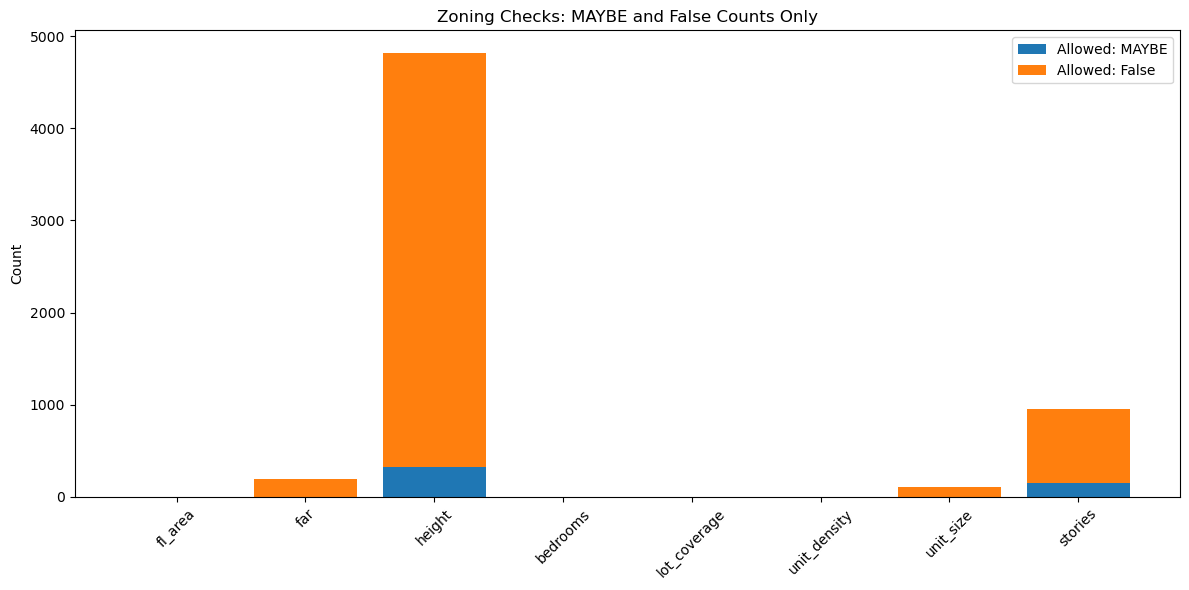

In [ ]:
# import pandas as pd

# # Suppose these are your pre-defined DataFrames for each check
# check_results = {
#     "height": check_height_result_all,
#     "height_eave": check_height_eave_result_all,
#     "stories": check_stories_result_all,
#     "unit_size": check_unit_size_result_all,
#     "far": check_far_result_all,
#     "unit_density": check_unit_density_result_all,
#     "lot_coverage": check_lot_coverage_result_all,
#     "fl_area": check_fl_area_result_all,
#     "bedrooms": check_bedrooms_result_all,
#     "unit_qty": check_unit_qty_result_all,
# }

# # Initialize the summary dictionary
# summary = {
#     "Label": [],
#     "True": [],
#     "False": [],
#     "MAYBE": []
# }

# # Iterate over the results and count each allowed status
# for label, df in check_results.items():
#     # Get value counts for the 'allowed' column
#     allowed_counts = df["allowed"].value_counts()
    
#     # Append the name and counts, with default to 0 if not found
#     summary["Label"].append(label)
#     summary["True"].append(allowed_counts.get(True, 0))
#     summary["False"].append(allowed_counts.get(False, 0))
#     summary["MAYBE"].append(allowed_counts.get("MAYBE", 0))

# # Convert the summary dictionary into a DataFrame
# summary_df = pd.DataFrame(summary)

# # Display the summary table
# print(summary_df)

### `add_setbacks` function
- `get_zoning_req` function is integrated internally.

In [49]:
file_path = r"/Users/houpuli/Dropbox/ceshi/tidybuilding/2_fam/"
tidybuilding_2_fam = unify_tidybuilding(file_path)
tidybuilding_2_fam

stories  height  width  depth  height_eave      type  gross_fl_area  \
0      2.5      45     35     40           35  2_family           3200   

   net_fl_area  max_unit_size  min_unit_size  mean_unit_size  total_bedrooms  \
0         3126           1563           1563            1563               6   

   total_units  footprint  units_3bed  units_3bed_minsize  units_3bed_maxsize  \
0            2       1400           2                1563                1563   

   units_floor1  units_floor2  units_floor3  
0             2             0             0

In [148]:
# Example usage:
add_setbacks_results = add_setbacks(tidybuilding_2_fam, tidyzoning_feeds.loc[[373]], tidyparcel_dim[tidyparcel_dim['parcel_id'] == 'Collin_County_combined_parcel_102719'], tidyparcel_geo[tidyparcel_geo['parcel_id'] == 'Collin_County_combined_parcel_102719'])
add_setbacks_results

Prop_ID             GEO_ID                             parcel_id  \
14139  2503294  R-5140-00E-0090-1  Collin_County_combined_parcel_102719   
14140  2503294  R-5140-00E-0090-1  Collin_County_combined_parcel_102719   
14141  2503294  R-5140-00E-0090-1  Collin_County_combined_parcel_102719   
14142  2503294  R-5140-00E-0090-1  Collin_County_combined_parcel_102719   
14143  2503294  R-5140-00E-0090-1  Collin_County_combined_parcel_102719   

          parcel_addr landuse landuse_spec             parcel_label  \
14139  890   DERBY CT       R           A1  cul_de_sac parcel_other   
14140  890   DERBY CT       R           A1  cul_de_sac parcel_other   
14141  890   DERBY CT       R           A1  cul_de_sac parcel_other   
14142  890   DERBY CT       R           A1  cul_de_sac parcel_other   
14143  890   DERBY CT       R           A1  cul_de_sac parcel_other   

      Found_Match match_road_address  shape_index  ...  shared_side  \
14139        True           Derby Ct     1.164104  ...        False   
14140        True           Derby Ct     1.164104  ...         True   
14141        True           Derby Ct     1.164104  ...         True   
14142        True           Derby Ct     1.164104  ...         True   
14143        True           Derby Ct     1.164104  ...        False   

       parcel_bearing  road_bearing      angle  distance_to_road  \
14139       -2.732984     -0.000002  23.411678         16.169501   
14140       -1.805070     -0.000002  76.577216         35.714161   
14141       -0.006169     -0.000002   0.353327         53.093845   
14142        1.577510     -0.000002  89.615248         31.418836   
14143       -3.138775     -0.000002   0.161550          9.632050   

                side                                           geometry  \
14139          front  LINESTRING (1297967.613 1242664.136, 1297965.5...   
14140  Interior side  LINESTRING (1297973.690 1242693.165, 1297973.6...   
14141           rear  LINESTRING (1297937.939 1242692.349, 1297961.2...   
14142  Interior side  LINESTRING (1297939.234 1242656.113, 1297937.9...   
14143          front  LINESTRING (1297951.203 1242656.493, 1297939.2...   

       setback  unit on_boundary  
14139     10.0  feet       False  
14140      5.0  feet       False  
14141     20.0  feet       False  
14142      5.0  feet       False  
14143     10.0  feet       False  

[5 rows x 23 columns]

### `get_buildable_area` function
- `get_zoning_req` function is integrated internally.

In [ ]:
# Example usage:
add_setbacks_results = add_setbacks(tidybuilding_4_fam_wide, tidyzoning.loc[[2]], confident_tidyparcel_dim[confident_tidyparcel_dim['parcel_id'] == 'Collin_County_combined_parcel_10000'], confident_tidyparcel[confident_tidyparcel['parcel_id'] == 'Collin_County_combined_parcel_10000'])
add_setbacks_results

Prop_ID              GEO_ID                            parcel_id  \
0  2747493  R-11137-00A-0150-1  Collin_County_combined_parcel_10000   
1  2747493  R-11137-00A-0150-1  Collin_County_combined_parcel_10000   
2  2747493  R-11137-00A-0150-1  Collin_County_combined_parcel_10000   
3  2747493  R-11137-00A-0150-1  Collin_County_combined_parcel_10000   

           parcel_addr landuse landuse_spec           parcel_label  \
0  8816   ABBINGTON PL       R           A1  regular inside parcel   
1  8816   ABBINGTON PL       R           A1  regular inside parcel   
2  8816   ABBINGTON PL       R           A1  regular inside parcel   
3  8816   ABBINGTON PL       R           A1  regular inside parcel   

  Found_Match match_road_address  shape_index  ...  angle_difference  \
0        True       Abbington Pl     1.284231  ...          0.201639   
1        True       Abbington Pl     1.284231  ...          0.201639   
2        True       Abbington Pl     1.284231  ...          0.201639   
3        True       Abbington Pl     1.284231  ...          0.201639   

   shared_side  parcel_bearing  road_bearing      angle  distance_to_road  \
0         True       -1.571972     -0.006727  89.681925         36.761265   
1         True       -0.003207     -0.006727   0.201640         62.382758   
2         True        1.569623     -0.006727  89.681813         36.697407   
3        False        3.138385     -0.006727   0.201639         11.075914   

            side                                           geometry   setback  \
0  Interior side  LINESTRING (-10768051.845 3919309.968, -107680...  [20, 15]   
1           rear  LINESTRING (-10768069.990 3919310.026, -107680...        25   
2  Interior side  LINESTRING (-10768070.050 3919258.718, -107680...  [20, 15]   
3          front  LINESTRING (-10768051.905 3919258.660, -107680...  [50, 30]   

   unit  
0  feet  
1  feet  
2  feet  
3  feet  

[4 rows x 22 columns]

In [24]:
get_buildable_area_result = get_buildable_area(add_setbacks_results)
get_buildable_area_result

Prop_ID                            parcel_id  \
0  2747493  Collin_County_combined_parcel_10000   

                        buildable_geometry_relaxable  \
0  POLYGON ((-10768065.467793169 3919267.84744810...   

                           buildable_geometry_strict  
0  POLYGON ((-10768063.937 3919273.939, -10768063...

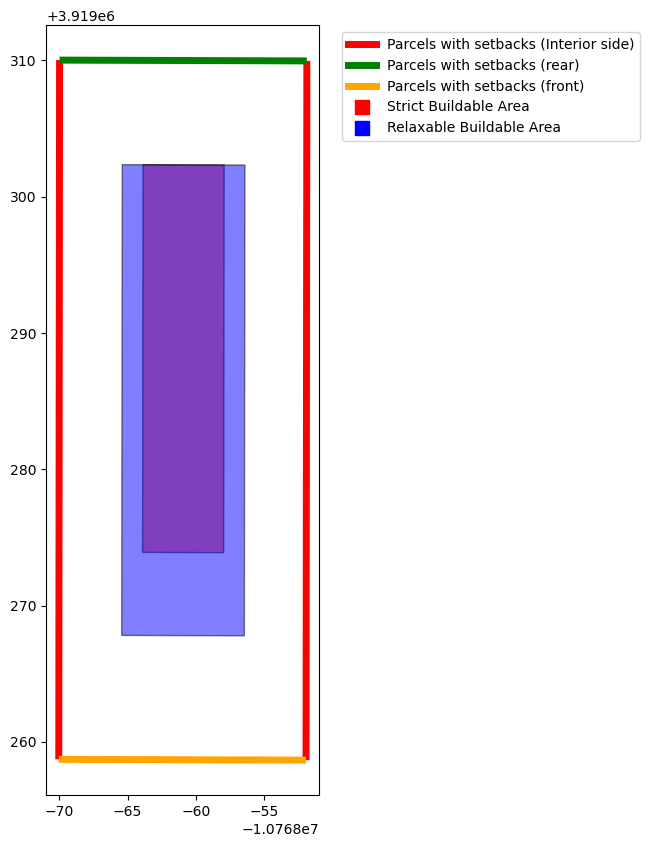

In [25]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Define a mapping from 'side' values to colors.
color_mapping = {
    'Interior side': 'red',
    'Exterior side': 'blue',
    'rear': 'green',
    'front': 'orange'
}

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the setbacks results by grouping based on the 'side' column.
for side, group in add_setbacks_results.groupby('side'):
    group.plot(
        ax=ax, 
        color=None, 
        alpha=1, 
        edgecolor=color_mapping.get(side, 'black'), 
        linewidth=5, 
        label=f'Parcels with setbacks ({side})'
    )

# Plot the strict buildable area.
strict_area = get_buildable_area_result.copy().set_geometry('buildable_geometry_strict')
strict_area.plot(
    ax=ax, 
    color='red', 
    alpha=0.5, 
    edgecolor='black', 
    label='Strict Buildable Area'
)

# Plot the relaxable buildable area.
relaxable_area = get_buildable_area_result.copy().set_geometry('buildable_geometry_relaxable')
relaxable_area.plot(
    ax=ax, 
    color='blue', 
    alpha=0.5, 
    edgecolor='black', 
    label='Relaxable Buildable Area'
)

# Create custom legend handles.
handles = []
# Add legend handles for each setbacks side.
for side in add_setbacks_results['side'].unique():
    color = color_mapping.get(side, 'black')
    handle = mlines.Line2D([], [], color=color, linewidth=5, label=f'Parcels with setbacks ({side})')
    handles.append(handle)
# Add handles for the buildable area layers.
handles.append(mlines.Line2D([], [], color='red', marker='s', markersize=10,
                             markerfacecolor='red', linestyle='None',
                             label='Strict Buildable Area'))
handles.append(mlines.Line2D([], [], color='blue', marker='s', markersize=10,
                             markerfacecolor='blue', linestyle='None',
                             label='Relaxable Buildable Area'))

ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(2.2, 1))
plt.show()

### `check_footprint()` function
- Based on Matt's Way

In [26]:
check_footprint_results = check_footprint(get_buildable_area_result, tidybuilding_4_fam_wide)
check_footprint_results

Processing Parcels: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


Prop_ID                            parcel_id  allowed
0  2747493  Collin_County_combined_parcel_10000    False

### Run Code by steps

### Run Code summariezed function

#### Statistic in each check function

##### Check the land use

In [23]:
from collections import Counter

# Extract uses_value, ensuring it is of list type
uses_values_list = tidyzoning['dist_info'].apply(
    lambda x: x.get('uses_permitted', {}).get('uses_value', [])
)

# Handle exceptional cases: if `uses_value` is a string, convert it to a list
cleaned_uses_values = uses_values_list.apply(lambda x: [x] if isinstance(x, str) else x)

# Calculate all unique uses_value
unique_uses_values = set(value for sublist in cleaned_uses_values for value in sublist)

# Count the occurrences of each uses_value
counts = Counter()
for uses in cleaned_uses_values:
    counts.update(uses)

# Create a DataFrame to calculate the percentage
counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['count'])
counts_df['percentage'] = counts_df['count'] / len(tidyzoning) * 100
counts_df

count  percentage
1_family                           114   40.569395
ADU                                103   36.654804
2_family                            45   16.014235
3_family                            44   15.658363
4_family                            45   16.014235
Townhome                            48   17.081851
none                               115   40.925267
Planned_Residential_Development     11    3.914591

##### Check the fl_area

In [24]:
fl_area_constraints = tidyzoning['structure_constraints'].apply(
    lambda x: {key: value for key, value in x.items() if 'fl_area' in key.lower()} if isinstance(x, dict) else {}
)
fl_area_constraints

0      {}
1      {}
2      {}
3      {}
4      {}
       ..
276    {}
277    {}
278    {}
279    {}
280    {}
Name: structure_constraints, Length: 281, dtype: object

##### Check the height

In [25]:
height_constraints = tidyzoning['structure_constraints'].apply(
    lambda x: {key: value for key, value in x.items() if 'height' in key.lower()} if isinstance(x, dict) else {}
)
height_constraints

0                                                     {}
1                                                     {}
2                                                     {}
3                                                     {}
4                                                     {}
                             ...                        
276                                                   {}
277                                                   {}
278                                                   {}
279    {'height': [{'unit': 'feet', 'use_name': '1_fa...
280                                                   {}
Name: structure_constraints, Length: 281, dtype: object

C:\Users\Admin\AppData\Local\Temp\ipykernel_24888\1675141653.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='use_name', y='height', data=filtered_df, palette="Set3")


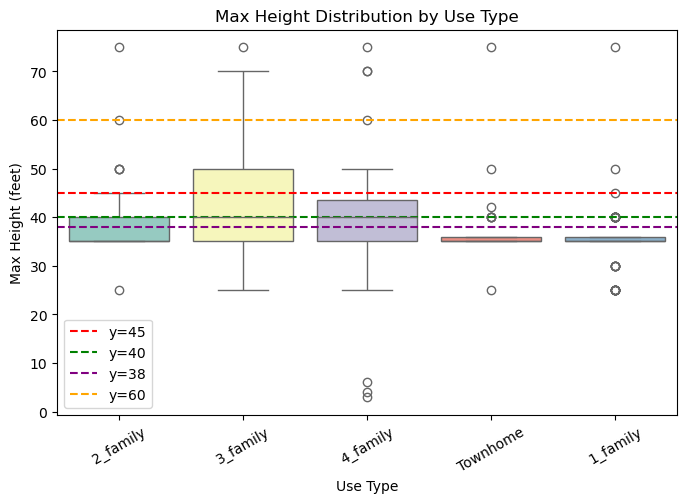

In [36]:
import seaborn as sns

# Step 1: Parse height data
height_data = []
for constraints in height_constraints:
    if isinstance(constraints, dict) and 'height' in constraints:
        for entry in constraints['height']:
            use_names = entry.get('use_name', [])
            max_val = entry.get('max_val')

            # Handle max_val: it could be a dictionary or a list
            if isinstance(max_val, list):  # Handle case where max_val is a list
                max_val = max_val[0] if len(max_val) > 0 else {}
            
            # Extract height value
            if isinstance(max_val, dict):
                if 'expression' in max_val:
                    height_value = max_val['expression']
                elif 'expressions' in max_val:
                    height_value = max(max_val['expressions'])  # Take the maximum value
                else:
                    height_value = None
            else:
                height_value = None

            # Ensure use_names is a list
            if isinstance(use_names, str):
                use_names = [use_names]

            # Record data
            if height_value:
                for use in use_names:
                    try:
                        height_data.append({'use_name': use, 'height': float(height_value)})
                    except ValueError:
                        pass  # Ignore values that cannot be converted

# Step 2: Convert to DataFrame
height_df = pd.DataFrame(height_data)

# Step 3: Keep only the housing types of interest
selected_types = ['1_family', '2_family', '3_family', '4_family', 'Townhome']
filtered_df = height_df[height_df['use_name'].isin(selected_types)]

# Step 4: Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='use_name', y='height', data=filtered_df, palette="Set3")

# Step 5: Add reference lines
for y_value, color, label in zip([45, 40, 38, 60], ['red', 'green', 'purple', 'orange'], ['y=45', 'y=40', 'y=38', 'y=60']):
    plt.axhline(y=y_value, color=color, linestyle='--', label=label)

# Step 6: Beautify the chart
plt.xlabel("Use Type")
plt.ylabel("Max Height (feet)")
plt.title("Max Height Distribution by Use Type")
plt.legend()
plt.xticks(rotation=30)

# Step 7: Show the chart
plt.show()

##### Check the bedrooms

In [37]:
bedrooms_constraints = tidyzoning['structure_constraints'].apply(
    lambda x: {key: value for key, value in x.items() if 'bedrooms' in key.lower()} if isinstance(x, dict) else {}
)
bedrooms_constraints

0      {}
1      {}
2      {}
3      {}
4      {}
       ..
276    {}
277    {}
278    {}
279    {}
280    {}
Name: structure_constraints, Length: 281, dtype: object

##### Check the unit density

In [26]:
unit_density_constraints = tidyzoning['structure_constraints'].apply(
    lambda x: {key: value for key, value in x.items() if 'unit_density' in key.lower()} if isinstance(x, dict) else {}
)
unit_density_constraints

0      {}
1      {}
2      {}
3      {}
4      {}
       ..
276    {}
277    {}
278    {}
279    {}
280    {}
Name: structure_constraints, Length: 281, dtype: object

C:\Users\Admin\AppData\Local\Temp\ipykernel_24888\2265464215.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='use_name', y='unit_density', data=filtered_df, palette="Set3")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


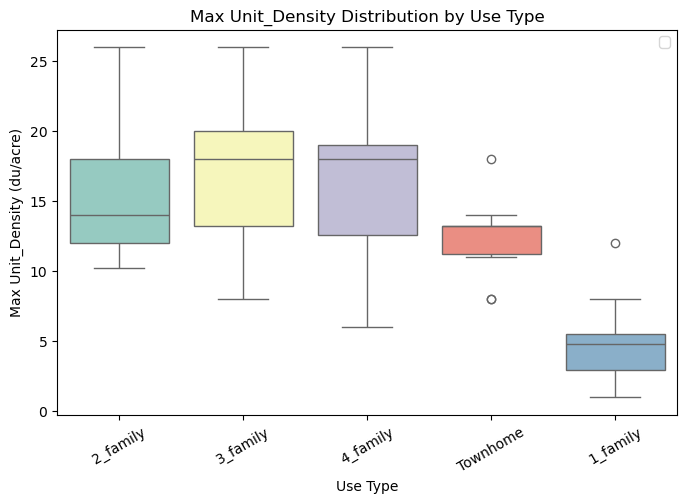

In [39]:
import seaborn as sns

# Step 1: Parse unit_density data
unit_density_data = []
for constraints in unit_density_constraints:
    if isinstance(constraints, dict) and 'unit_density' in constraints:
        for entry in constraints['unit_density']:
            use_names = entry.get('use_name', [])
            max_val = entry.get('max_val')

            # Handle max_val: it could be a dictionary or a list
            if isinstance(max_val, list):  # Handle case where max_val is a list
                max_val = max_val[0] if len(max_val) > 0 else {}
            
            # Extract unit_density value
            if isinstance(max_val, dict):
                if 'expression' in max_val:
                    unit_density_value = max_val['expression']
                elif 'expressions' in max_val:
                    unit_density_value = max(max_val['expressions'])  # Take the maximum value
                else:
                    unit_density_value = None
            else:
                unit_density_value = None

            # Ensure use_names is a list
            if isinstance(use_names, str):
                use_names = [use_names]

            # Record data
            if unit_density_value:
                for use in use_names:
                    try:
                        unit_density_data.append({'use_name': use, 'unit_density': float(unit_density_value)})
                    except ValueError:
                        pass  # Ignore values that cannot be converted

# Step 2: Convert to DataFrame
unit_density_df = pd.DataFrame(unit_density_data)

# Step 3: Keep only the housing types of interest
selected_types = ['1_family', '2_family', '3_family', '4_family', 'Townhome']
filtered_df = unit_density_df[unit_density_df['use_name'].isin(selected_types)]

# Step 4: Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='use_name', y='unit_density', data=filtered_df, palette="Set3")

# Step 5: Beautify the chart
plt.xlabel("Use Type")
plt.ylabel("Max Unit_Density (du/acre)")
plt.title("Max Unit_Density Distribution by Use Type")
plt.legend()
plt.xticks(rotation=30)

# Step 7: Show the chart
plt.show()

##### Check the unit size

In [27]:
unit_size_constraints = tidyzoning['structure_constraints'].apply(
    lambda x: {key: value for key, value in x.items() if 'unit_size' in key.lower()} if isinstance(x, dict) else {}
)
unit_size_constraints

0      {'unit_size': [{'unit': 'square feet', 'use_na...
1      {'unit_size': [{'unit': 'square feet', 'use_na...
2      {'unit_size': [{'unit': 'square feet', 'use_na...
3                                                     {}
4                                                     {}
                             ...                        
276                                                   {}
277                                                   {}
278                                                   {}
279                                                   {}
280                                                   {}
Name: structure_constraints, Length: 281, dtype: object

C:\Users\Admin\AppData\Local\Temp\ipykernel_24888\513548288.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='use_name', y='unit_size', data=filtered_df, palette="Set3")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


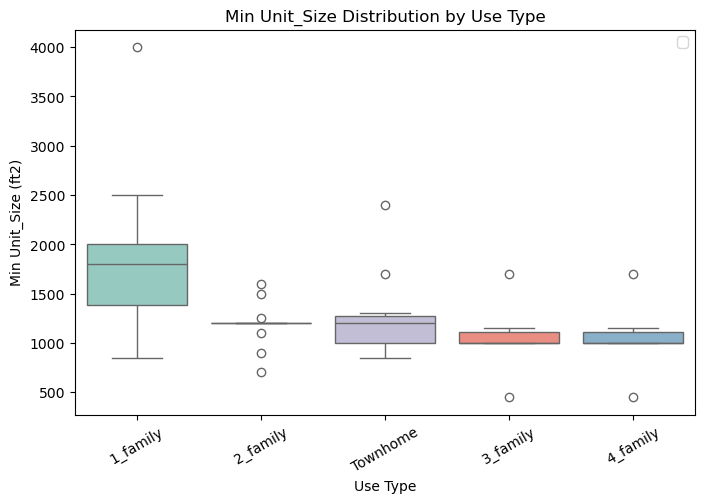

In [41]:
import seaborn as sns
import re

# Step 1: Parse unit_size data
unit_size_data = []
bedrooms = 6  # Default bedrooms=6

for constraints in unit_size_constraints:
    if isinstance(constraints, dict) and 'unit_size' in constraints:
        for entry in constraints['unit_size']:
            use_names = entry.get('use_name', [])
            min_val = entry.get('min_val')

            # Handle min_val: it could be a dictionary or a list
            if isinstance(min_val, list):  
                min_val = min_val[0] if len(min_val) > 0 else {}

            # Extract expression
            if isinstance(min_val, dict) and 'expression' in min_val:
                raw_expr = min_val['expression']
                
                # Skip "NA" values
                if raw_expr == 'NA':
                    continue
                
                # Handle "0/1 BR: 600; 2 BR: 800; 3BR: 1000"
                if re.search(r'3BR:\s*\d+', raw_expr):
                    match = re.search(r'3BR:\s*(\d+)', raw_expr)
                    unit_size_value = float(match.group(1)) if match else None
                
                # Handle "800 + 150 * bedrooms" calculation
                elif re.search(r'bedrooms', raw_expr):
                    try:
                        unit_size_value = eval(raw_expr.replace("bedrooms", str(bedrooms)))
                    except:
                        unit_size_value = None
                
                # Handle regular numeric values
                else:
                    try:
                        unit_size_value = float(raw_expr)
                    except ValueError:
                        unit_size_value = None
            else:
                unit_size_value = None

            # Ensure use_names is a list
            if isinstance(use_names, str):
                use_names = [use_names]

            # Record data
            if unit_size_value:
                for use in use_names:
                    try:
                        unit_size_data.append({'use_name': use, 'unit_size': unit_size_value})
                    except ValueError:
                        pass  # Ignore values that cannot be converted
                    
# Step 2: Convert to DataFrame
unit_size_df = pd.DataFrame(unit_size_data)

# Step 3: Keep only the housing types of interest
selected_types = ['1_family', '2_family', '3_family', '4_family', 'Townhome']
filtered_df = unit_size_df[unit_size_df['use_name'].isin(selected_types)]

# Step 4: Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='use_name', y='unit_size', data=filtered_df, palette="Set3")

# Step 5: Beautify the chart
plt.xlabel("Use Type")
plt.ylabel("Min Unit_Size (ft2)")
plt.title("Min Unit_Size Distribution by Use Type")
plt.legend()
plt.xticks(rotation=30)

# Step 7: Show the chart
plt.show()

##### Check the Far

In [28]:
far_constraints = tidyzoning['structure_constraints'].apply(
    lambda x: {key: value for key, value in x.items() if 'far' in key.lower()} if isinstance(x, dict) else {}
)
far_constraints

0      {}
1      {}
2      {}
3      {}
4      {}
       ..
276    {}
277    {}
278    {}
279    {}
280    {}
Name: structure_constraints, Length: 281, dtype: object

C:\Users\Admin\AppData\Local\Temp\ipykernel_24888\2235503832.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='use_name', y='far', data=filtered_df, palette="Set3")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


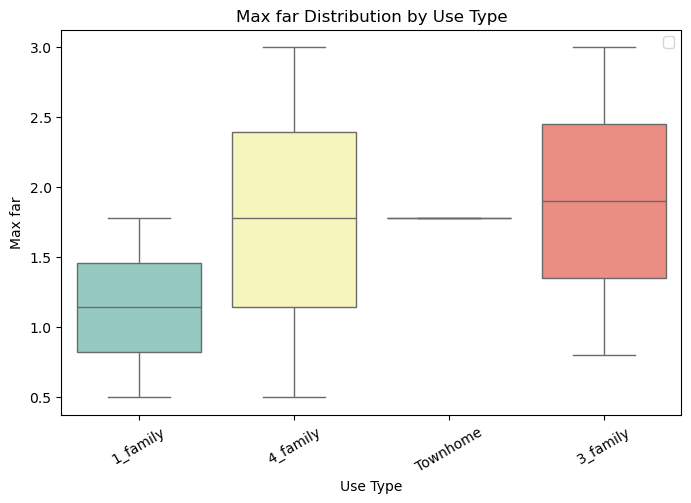

In [43]:
import seaborn as sns

# Step 1: Parse far data
far_data = []
for constraints in far_constraints:
    if isinstance(constraints, dict) and 'far' in constraints:
        for entry in constraints['far']:
            use_names = entry.get('use_name', [])
            max_val = entry.get('max_val')

            # Handle max_val: it could be a dictionary or a list
            if isinstance(max_val, list):  # Handle case where max_val is a list
                max_val = max_val[0] if len(max_val) > 0 else {}
            
            # Extract far value
            if isinstance(max_val, dict):
                if 'expression' in max_val:
                    far_value = max_val['expression']
                elif 'expressions' in max_val:
                    far_value = max(max_val['expressions'])  # Take the maximum value
                else:
                    far_value = None
            else:
                far_value = None

            # Ensure use_names is a list
            if isinstance(use_names, str):
                use_names = [use_names]

            # Record data
            if far_value:
                for use in use_names:
                    try:
                        far_data.append({'use_name': use, 'far': float(far_value)})
                    except ValueError:
                        pass  # Ignore values that cannot be converted

# Step 2: Convert to DataFrame
far_df = pd.DataFrame(far_data)

# Step 3: Keep only the housing types of interest
selected_types = ['1_family', '2_family', '3_family', '4_family', 'Townhome']
filtered_df = far_df[far_df['use_name'].isin(selected_types)]

# Step 4: Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='use_name', y='far', data=filtered_df, palette="Set3")

# Step 5: Beautify the chart
plt.xlabel("Use Type")
plt.ylabel("Max far")
plt.title("Max far Distribution by Use Type")
plt.legend()
plt.xticks(rotation=30)

# Step 7: Show the chart
plt.show()

##### Check the Lot_coverage

In [29]:
lot_coverage_constraints = tidyzoning['structure_constraints'].apply(
    lambda x: {key: value for key, value in x.items() if 'lot_coverage' in key.lower()} if isinstance(x, dict) else {}
)
lot_coverage_constraints

0      {}
1      {}
2      {}
3      {}
4      {}
       ..
276    {}
277    {}
278    {}
279    {}
280    {}
Name: structure_constraints, Length: 281, dtype: object

### `zoning_analysis_pipeline` functions  

- 00.check_land_use
- 01.check_height
- 02.check_stories
- 03.check_unit_size
- 04.check_far
- 05.check_unit_density
- 06.check_bedrooms
- 07.check_lot_coverage
- 08.check_fl_area

In [ ]:
tidybuilding_4_famtall_result_25 = zoning_analysis_pipeline(tidybuilding_4_fam_wide, part_tidyzoning_3081, tidyparcel_3081, confident_tidyparcel_3081, n_jobs=12, debug=True)
tidybuilding_4_famtall_result_25

Parcel count: total 345350 parcels,
14068 passed land use check; others marked as check_land_use=False.
Percentage remaining: 4.07%.


Processing Allowed Parcels:  35%|███▍      | 4872/14068 [02:44<07:00, 21.89it/s]/opt/anaconda3/envs/houpu_py/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Processing Allowed Parcels: 100%|██████████| 14068/14068 [09:11<00:00, 25.52it/s]


Number of parcels to run check_footprint after passing previous checks: 7669 (2.22% of total parcels)


Processing Further Checks: 100%|██████████| 7669/7669 [18:39<00:00,  6.85it/s]


Prop_ID                             parcel_id  zoning_id allowed  \
0        2747493   Collin_County_combined_parcel_10000       1318   False   
1        2702267  Collin_County_combined_parcel_100028       1462   False   
2        2082442  Collin_County_combined_parcel_100030       1318   False   
3        2129279  Collin_County_combined_parcel_100049       1451   False   
4        1262715  Collin_County_combined_parcel_100067        412   False   
...          ...                                   ...        ...     ...   
345345  783763.0      Wise_County_combined_parcel_9058         66   False   
345346  783634.0      Wise_County_combined_parcel_9195        169    True   
345347  755021.0      Wise_County_combined_parcel_9452        171   False   
345348  753256.0      Wise_County_combined_parcel_9590        270   False   
345349  768605.0      Wise_County_combined_parcel_9946         22   False   

                            reason  \
0                   check_land_use   
1                   check_land_use   
2                   check_land_use   
3                   check_land_use   
4                   check_land_use   
...                            ...   
345345              check_land_use   
345346  Our tidybuilding is fitted   
345347              check_land_use   
345348              check_land_use   
345349              check_land_use   

                                            check_process  
0                               {'check_land_use': False}  
1                               {'check_land_use': False}  
2                               {'check_land_use': False}  
3                               {'check_land_use': False}  
4                               {'check_land_use': False}  
...                                                   ...  
345345                          {'check_land_use': False}  
345346  {'check_land_use': True, 'check_height': True,...  
345347                          {'check_land_use': False}  
345348                          {'check_land_use': False}  
345349                          {'check_land_use': False}  

[345350 rows x 6 columns]

In [ ]:
tidybuilding_4_famtall_result_25.to_csv(r"/Users/houpuli/Dropbox/ceshi/tidybuilding_4_famtall_result_25.csv", index=False)

In [10]:
tidybuilding_4_famtall_result_df = zoning_analysis_pipeline(tidybuilding_4_fam_wide, tidyzoning_feeds, tidyparcel_dim, tidyparcel_geo, n_jobs=12, debug=True)
tidybuilding_4_famtall_result_df

Parcel count: total 2018672 parcels,
102358 passed land use check; others marked as check_land_use=False.
Percentage remaining: 5.07%.
Confidence breakdown:
  • confidence_parcel: 84.08%
  • non_confidence_parcel: 15.92%


Processing Allowed Parcels:   2%|▏         | 1848/102358 [00:48<36:34, 45.80it/s]  /opt/anaconda3/envs/houpu_py/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Processing Allowed Parcels: 100%|██████████| 102358/102358 [1:26:32<00:00, 19.71it/s]


Number of parcels to run check_footprint after passing previous checks: 45271 (2.24% of total parcels)


Processing Further Checks: 100%|██████████| 45271/45271 [4:51:55<00:00,  2.58it/s]


Prop_ID                             parcel_id  zoning_id  \
0         2025440   Collin_County_combined_parcel_10002       1829   
1         2511117  Collin_County_combined_parcel_100024       1665   
2         1356776  Collin_County_combined_parcel_100035       1643   
3         2554209   Collin_County_combined_parcel_10004        987   
4         1633511  Collin_County_combined_parcel_100040        541   
...           ...                                   ...        ...   
2018667  775825.0       Wise_County_combined_parcel_990       1929   
2018668  775849.0       Wise_County_combined_parcel_993       1929   
2018669  775848.0       Wise_County_combined_parcel_994       1929   
2018670  768988.0      Wise_County_combined_parcel_9945        264   
2018671  768605.0      Wise_County_combined_parcel_9946         83   

                    confidence allowed          reason  \
0        non_confidence_parcel   False  check_land_use   
1        non_confidence_parcel   False  check_land_use   
2        non_confidence_parcel   False  check_land_use   
3        non_confidence_parcel   False  check_land_use   
4        non_confidence_parcel   False  check_land_use   
...                        ...     ...             ...   
2018667      confidence_parcel   False  check_land_use   
2018668      confidence_parcel   False  check_land_use   
2018669      confidence_parcel   False  check_land_use   
2018670      confidence_parcel   False  check_land_use   
2018671      confidence_parcel   False  check_land_use   

                     check_process  
0        {'check_land_use': False}  
1        {'check_land_use': False}  
2        {'check_land_use': False}  
3        {'check_land_use': False}  
4        {'check_land_use': False}  
...                            ...  
2018667  {'check_land_use': False}  
2018668  {'check_land_use': False}  
2018669  {'check_land_use': False}  
2018670  {'check_land_use': False}  
2018671  {'check_land_use': False}  

[2018672 rows x 7 columns]

In [19]:
tidybuilding_4_famtall_result_df = zoning_analysis_pipeline(tidybuilding_4_fam_wide, tidyzoning_feeds, tidyparcel_dim, tidyparcel_geo, n_jobs=12, debug=True)
tidybuilding_4_famtall_result_df

Parcel count: total 2019242 parcels,
102402 passed land use check; others marked as check_land_use=False.
Percentage remaining: 5.07%.
Overall Confidence breakdown:
  • confidence_parcel: 84.05%
  • non_confidence_parcel: 15.95%

Confidence breakdown (landuse allowed parcels only):
  • confidence_parcel: 73.75%
  • non_confidence_parcel: 26.25%


Processing Allowed Parcels:   1%|          | 1140/102402 [00:32<47:39, 35.41it/s] /opt/anaconda3/envs/houpu_py/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Processing Allowed Parcels: 100%|██████████| 102402/102402 [1:38:46<00:00, 17.28it/s] 


KeyError: 'confidence'

In [ ]:
tidybuilding_4_famtall_result_df.to_csv(r"/Users/houpuli/Dropbox/ceshi/tidybuilding_4_famtall_result_df.csv", index=False)

### Debugging the process

In [45]:
kamryn_results = pd.read_csv(r"/Users/houpuli/Dropbox/ceshi/all_checks_25_pct_lu_TRUE.csv")
kamryn_results['zoning_id'] = kamryn_results['zoning_id'] - 1
kamryn_results

Unnamed: 0  Prop_ID                             parcel_id  \
0        1.240000  1140143  Collin_County_combined_parcel_100303   
1        1.540000  2712455   Collin_County_combined_parcel_10067   
2        1.570000  2529683  Collin_County_combined_parcel_100752   
3        1.134000  1105725  Collin_County_combined_parcel_101602   
4        1.208000  2529792  Collin_County_combined_parcel_102471   
...           ...      ...                                   ...   
14063    7.345223   781626     Wise_County_combined_parcel_48085   
14064    7.345287   746915       Wise_County_combined_parcel_647   
14065    7.345313   753228      Wise_County_combined_parcel_7455   
14066    7.345331   790473      Wise_County_combined_parcel_8586   
14067    7.345347   783634      Wise_County_combined_parcel_9195   

                  Parcel_label   lot_width    lot_depth  lot_area  zoning_id  \
0        regular inside parcel   60.377629    57.094367  0.078207       1319   
1        regular inside parcel   48.491800   119.395533  0.132909       1319   
2      special parcel_standard   43.442223   131.532296  0.127566       1761   
3        regular inside parcel  129.624525   141.769853  0.416691       1319   
4        regular inside parcel   44.287817   137.043459  0.134441       1761   
...                        ...         ...          ...       ...        ...   
14063    regular corner parcel  119.416309    83.757465  0.229614        168   
14064    regular corner parcel  400.201694   312.001538  2.862745        168   
14065    regular inside parcel  261.767899   120.502010  0.623661        273   
14066    regular corner parcel  920.796514  1122.352092  7.477974         71   
14067  special parcel_standard  326.682317   214.367352  1.399150        169   

       check_land_use check_height  check_height_eave check_floors  \
0                True         TRUE               True         TRUE   
1                True         TRUE               True         TRUE   
2                True         TRUE               True         TRUE   
3                True         TRUE               True         TRUE   
4                True         TRUE               True         TRUE   
...               ...          ...                ...          ...   
14063            True         TRUE               True         TRUE   
14064            True         TRUE               True         TRUE   
14065            True         TRUE               True         TRUE   
14066            True         TRUE               True         TRUE   
14067            True         TRUE               True         TRUE   

      check_unit_size  check_far check_unit_density check_lot_coverage  \
0                TRUE       True               TRUE               TRUE   
1                TRUE       True               TRUE               TRUE   
2               FALSE       True              FALSE               TRUE   
3                TRUE       True               TRUE               TRUE   
4               FALSE       True              FALSE               TRUE   
...               ...        ...                ...                ...   
14063            TRUE       True               TRUE               TRUE   
14064            TRUE       True               TRUE               TRUE   
14065            TRUE       True               TRUE               TRUE   
14066            TRUE       True               TRUE               TRUE   
14067            TRUE       True               TRUE               TRUE   

       check_fl_area  check_unit_qty  
0               True            True  
1               True            True  
2               True            True  
3               True            True  
4               True            True  
...              ...             ...  
14063           True            True  
14064           True            True  
14065           True            True  
14066           True            True  
14067           True            True  

[14068 rows x 18 columns]

In [46]:
cols = [
    'check_land_use', 'check_height', 'check_height_eave', 'check_floors',
    'check_unit_size', 'check_far', 'check_unit_density', 'check_lot_coverage',
    'check_fl_area', 'check_unit_qty'
]
kamryn_results[cols] = kamryn_results[cols].applymap(lambda x: str(x).upper())
statistic_results = pd.DataFrame(index=["TRUE", "FALSE", "MAYBE"])

for col in cols:
    count_series = kamryn_results[col].value_counts()
    statistic_results[col] = count_series

statistic_results = statistic_results.fillna(0).astype(int)
statistic_results = statistic_results.transpose()
statistic_results

/var/folders/s5/1g0kvw1x37z1n8xgxcp8f3lh0000gn/T/ipykernel_1298/1597969407.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  kamryn_results[cols] = kamryn_results[cols].applymap(lambda x: str(x).upper())


TRUE  FALSE  MAYBE
check_land_use      14068      0      0
check_height         9249   4492    327
check_height_eave   14068      0      0
check_floors        13113    805    150
check_unit_size     13442    623      3
check_far           13869    199      0
check_unit_density  12240   1824      4
check_lot_coverage  13012   1049      7
check_fl_area       14068      0      0
check_unit_qty      14062      6      0

In [66]:
cols = [
    'check_land_use', 'check_height', 'check_height_eave', 'check_floors',
    'check_unit_size', 'check_far', 'check_unit_density',
    'check_lot_coverage', 'check_fl_area', 'check_unit_qty'
]

# create a boolean DataFrame marking True wherever the cell is True (or the string 'True')
checks_bool = kamryn_results[cols].applymap(lambda x: x is True or x == 'TRUE')

# count how many rows have every column True
count_all_true = checks_bool.all(axis=1).sum()

print(f"{count_all_true} rows have all {len(cols)} checks == TRUE")

7712 rows have all 10 checks == TRUE


/var/folders/s5/1g0kvw1x37z1n8xgxcp8f3lh0000gn/T/ipykernel_1298/644753729.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  checks_bool = kamryn_results[cols].applymap(lambda x: x is True or x == 'TRUE')


In [18]:
compare_id_differences(check_lot_coverage_result_all, kamryn_results, kamryn_filter_col='check_lot_coverage')

Only in the first dataset for zoning_id: set()
Only in kamryn_results for zoning_id: set()
Only in the first dataset for parcel_id: set()
Only in kamryn_results for parcel_id: set()


In [ ]:
draft_check = zoning_analysis_pipeline(tidybuilding_4_fam_wide, tidyzoning_3857, tidyparcel_3857, confident_tidyparcel_3857, n_jobs=12, debug=True)
draft_check

Parcel count: total 345350 parcels,
14068 passed land use check; others marked as check_land_use=False.
Percentage remaining: 4.07%.


Processing Allowed Parcels: 100%|██████████| 14068/14068 [11:50<00:00, 19.80it/s]


Prop_ID                             parcel_id  zoning_id allowed  \
14068    2747493   Collin_County_combined_parcel_10000       1318   False   
14069    2702267  Collin_County_combined_parcel_100028       1462   False   
14070    2082442  Collin_County_combined_parcel_100030       1318   False   
14071    2129279  Collin_County_combined_parcel_100049       1451   False   
14072    1262715  Collin_County_combined_parcel_100067        412   False   
...          ...                                   ...        ...     ...   
345346  783763.0      Wise_County_combined_parcel_9058         66   False   
14067   783634.0      Wise_County_combined_parcel_9195        169    True   
345347  755021.0      Wise_County_combined_parcel_9452        171   False   
345348  753256.0      Wise_County_combined_parcel_9590        270   False   
345349  768605.0      Wise_County_combined_parcel_9946         22   False   

                             reason  \
14068                check_land_use   
14069                check_land_use   
14070                check_land_use   
14071                check_land_use   
14072                check_land_use   
...                             ...   
345346               check_land_use   
14067   Our tidybuilding is allowed   
345347               check_land_use   
345348               check_land_use   
345349               check_land_use   

                                            check_process  
14068                           {'check_land_use': False}  
14069                           {'check_land_use': False}  
14070                           {'check_land_use': False}  
14071                           {'check_land_use': False}  
14072                           {'check_land_use': False}  
...                                                   ...  
345346                          {'check_land_use': False}  
14067   {'check_land_use': True, 'check_height': True,...  
345347                          {'check_land_use': False}  
345348                          {'check_land_use': False}  
345349                          {'check_land_use': False}  

[345350 rows x 6 columns]

In [20]:
initial_check = draft_check[draft_check['allowed'] == True]
initial_check

Prop_ID                             parcel_id  zoning_id allowed  \
0       1140143  Collin_County_combined_parcel_100303       1319    True   
1       2712455   Collin_County_combined_parcel_10067       1319    True   
3       1105725  Collin_County_combined_parcel_101602       1319    True   
7       1326443  Collin_County_combined_parcel_104198       1319    True   
8       2107181  Collin_County_combined_parcel_104734       1319    True   
...         ...                                   ...        ...     ...   
14063  781626.0     Wise_County_combined_parcel_48085        168    True   
14064  746915.0       Wise_County_combined_parcel_647        168    True   
14065  753228.0      Wise_County_combined_parcel_7455        273    True   
14066  790473.0      Wise_County_combined_parcel_8586         71    True   
14067  783634.0      Wise_County_combined_parcel_9195        169    True   

                            reason  \
0      Our tidybuilding is allowed   
1      Our tidybuilding is allowed   
3      Our tidybuilding is allowed   
7      Our tidybuilding is allowed   
8      Our tidybuilding is allowed   
...                            ...   
14063  Our tidybuilding is allowed   
14064  Our tidybuilding is allowed   
14065  Our tidybuilding is allowed   
14066  Our tidybuilding is allowed   
14067  Our tidybuilding is allowed   

                                           check_process  
0      {'check_land_use': True, 'check_height': True,...  
1      {'check_land_use': True, 'check_height': True,...  
3      {'check_land_use': True, 'check_height': True,...  
7      {'check_land_use': True, 'check_height': True,...  
8      {'check_land_use': True, 'check_height': True,...  
...                                                  ...  
14063  {'check_land_use': True, 'check_height': True,...  
14064  {'check_land_use': True, 'check_height': True,...  
14065  {'check_land_use': True, 'check_height': True,...  
14066  {'check_land_use': True, 'check_height': True,...  
14067  {'check_land_use': True, 'check_height': True,...  

[7712 rows x 6 columns]

In [23]:
kamryn_final_result2 = pd.read_csv(r'/Users/houpuli/Dropbox/ceshi/check_footprint_25_pct.csv')
kamryn_final_result2['zoning_id'] = kamryn_final_result2['zoning_id'] -1
kamryn_final_result2

Prop_ID                             parcel_id             Parcel_label  \
0     1140143  Collin_County_combined_parcel_100303    regular inside parcel   
1     2712455   Collin_County_combined_parcel_10067    regular inside parcel   
2     1105725  Collin_County_combined_parcel_101602    regular inside parcel   
3     1326443  Collin_County_combined_parcel_104198    regular corner parcel   
4     2107181  Collin_County_combined_parcel_104734    regular corner parcel   
...       ...                                   ...                      ...   
7588   781626     Wise_County_combined_parcel_48085    regular corner parcel   
7589   746915       Wise_County_combined_parcel_647    regular corner parcel   
7590   753228      Wise_County_combined_parcel_7455    regular inside parcel   
7591   790473      Wise_County_combined_parcel_8586    regular corner parcel   
7592   783634      Wise_County_combined_parcel_9195  special parcel_standard   

       lot_width    lot_depth  lot_area  zoning_id  check_land_use  \
0      60.377629    57.094367  0.078207       1319            True   
1      48.491800   119.395533  0.132909       1319            True   
2     129.624525   141.769853  0.416691       1319            True   
3      78.757869   141.739173  0.256268       1319            True   
4     125.414149   152.311911  0.437292       1319            True   
...          ...          ...       ...        ...             ...   
7588  119.416309    83.757465  0.229614        168            True   
7589  400.201694   312.001538  2.862745        168            True   
7590  261.767899   120.502010  0.623661        273            True   
7591  920.796514  1122.352092  7.477974         71            True   
7592  326.682317   214.367352  1.399150        169            True   

      check_height  check_height_eave  check_floors  check_unit_size  \
0             True               True          True             True   
1             True               True          True             True   
2             True               True          True             True   
3             True               True          True             True   
4             True               True          True             True   
...            ...                ...           ...              ...   
7588          True               True          True             True   
7589          True               True          True             True   
7590          True               True          True             True   
7591          True               True          True             True   
7592          True               True          True             True   

      check_far  check_unit_density  check_lot_coverage  check_fl_area  \
0          True                True                True           True   
1          True                True                True           True   
2          True                True                True           True   
3          True                True                True           True   
4          True                True                True           True   
...         ...                 ...                 ...            ...   
7588       True                True                True           True   
7589       True                True                True           True   
7590       True                True                True           True   
7591       True                True                True           True   
7592       True                True                True           True   

      bldg_area  check_footprint_area check_footprint  
0          2496                  True            TRUE  
1          2496                  True            TRUE  
2          2496                  True            TRUE  
3          2496                  True            TRUE  
4          2496                  True            TRUE  
...         ...                   ...             ...  
7588       2496                  True           FALSE  
75

In [ ]:
import pandas as pd

def compare_id_differences_initial(df_houpu, df_kamryn, kamryn_filter_col='check_far'):
    """
    Compare the differences in 'zoning_id' and 'parcel_id' between two datasets that meet specific conditions,
    and directly print the results.

    Parameters:
      df_houpu: The first dataset, which contains the fields 'allowed', 'zoning_id', and 'parcel_id'.
      df_kamryn: The second dataset, which contains the filtering field (default is 'check_far'), 
                 'zoning_id', and 'parcel_id'.
      kamryn_filter_col: The name of the field used for filtering df_kamryn. Default value is 'check_far'.

    Processing logic:
      - Filter df_houpu: retain records where 'allowed' is False or 'MAYBE'.
      - Filter df_kamryn: retain records where the filtering field (kamryn_filter_col) is False or 'MAYBE'.
      - Compare the filtered 'zoning_id' and 'parcel_id' values by computing the differences.
      - Print the results as follows:
            "Only in the first dataset for <field>: set(...)"
            "Only in kamryn_results for <field>: set(...)"

    Example:
      compare_id_differences(check_far_result_all, kamryn_results, kamryn_filter_col='check_far')
    """
    # Define the fields to compare: only 'zoning_id' and 'parcel_id'
    compare_cols = ['zoning_id', 'parcel_id']
    
    # # Filter df_houpu: retain records where 'allowed' is False or 'MAYBE'
    # filtered_all = df_houpu[(df_houpu['allowed'] == False) | (df_houpu['allowed'] == 'MAYBE')]
    # # Filter df_kamryn: retain records where the filtering field is False or 'MAYBE'
    # filtered_kamryn = df_kamryn[(df_kamryn[kamryn_filter_col] == 'FALSE') | (df_kamryn[kamryn_filter_col] == 'MAYBE')]
    
    # Loop over the fields to compare, calculate and print the differences
    for col in compare_cols:
        set_all = set(df_houpu[col])
        set_kamryn = set(df_kamryn[col])
        
        only_in_all = set_all - set_kamryn
        only_in_kamryn = set_kamryn - set_all
        
        print("Only in the first dataset for {}: {≠}".format(col, only_in_all))
        print("Only in kamryn_results for {}: {}".format(col, only_in_kamryn))
        
compare_id_differences_initial(initial_check, kamryn_final_result2, kamryn_filter_col='check_lot_coverage')

Only in the first dataset for zoning_id: set()
Only in kamryn_results for zoning_id: {941}
Only in the first dataset for parcel_id: {'Denton_County_combined_parcel_311768', 'Tarrant_County_combined_parcel_386329', 'Dallas_County_combined_parcel_661982', 'Tarrant_County_combined_parcel_326417', 'Dallas_County_combined_parcel_578322', 'Tarrant_County_combined_parcel_135885', 'Tarrant_County_combined_parcel_542675', 'Hood_County_combined_parcel_15848', 'Tarrant_County_combined_parcel_328163', 'Tarrant_County_combined_parcel_1133669', 'Denton_County_combined_parcel_210486', 'Denton_County_combined_parcel_196689', 'Tarrant_County_combined_parcel_1953654', 'Denton_County_combined_parcel_210012', 'Denton_County_combined_parcel_272991', 'Tarrant_County_combined_parcel_135849', 'Denton_County_combined_parcel_181217', 'Denton_County_combined_parcel_198715', 'Tarrant_County_combined_parcel_571313', 'Tarrant_County_combined_parcel_386312', 'Dallas_County_combined_parcel_602737', 'Ellis_County_comb

In [36]:
draft_check[draft_check['parcel_id'] == 'Denton_County_combined_parcel_311768']

Prop_ID                             parcel_id  zoning_id allowed  \
5288  744052  Denton_County_combined_parcel_311768       1256    True   

                           reason  \
5288  Our tidybuilding is allowed   

                                          check_process  
5288  {'check_land_use': True, 'check_height': True,...

In [43]:
tidyzoning_3857.loc[1256]['structure_constraints']

{'setback_front': [{'unit': 'feet',
   'use_name': ['1_family', '3_family', '4_family', 'Townhome'],
   'min_val': [{'conditions': ['height <= 80'],
     'select': 'max',
     'select_info': 'NA',
     'expressions': [0, 0]},
    {'conditions': ['height > 80'], 'expression': '(height - 80) / 2'}]}],
 'setback_side_int': [{'unit': 'feet',
   'use_name': ['1_family', '3_family', '4_family', 'Townhome'],
   'min_val': [{'conditions': ['height <= 80'],
     'select': 'max',
     'select_info': 'NA',
     'expressions': [0, '0']},
    {'conditions': ['height > 80'], 'expression': '(height - 80) / 2'}]}],
 'setback_side_ext': [{'unit': 'feet',
   'use_name': ['1_family', '3_family', '4_family', 'Townhome'],
   'min_val': [{'conditions': ['height <= 80'], 'expression': 0},
    {'conditions': ['height > 80'], 'expression': '(height - 80) / 2'}]}],
 'setback_rear': [{'unit': 'feet',
   'use_name': ['1_family', '3_family', '4_family', 'Townhome'],
   'min_val': [{'conditions': ['height <= 80'],


In [61]:
kamryn_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14068 entries, 0 to 14067
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          14068 non-null  float64
 1   Prop_ID             14046 non-null  object 
 2   parcel_id           14068 non-null  object 
 3   Parcel_label        14068 non-null  object 
 4   lot_width           14068 non-null  float64
 5   lot_depth           14068 non-null  float64
 6   lot_area            14068 non-null  float64
 7   zoning_id           14068 non-null  int64  
 8   check_land_use      14068 non-null  object 
 9   check_height        14068 non-null  object 
 10  check_height_eave   14068 non-null  object 
 11  check_floors        14068 non-null  object 
 12  check_unit_size     14068 non-null  object 
 13  check_far           14068 non-null  object 
 14  check_unit_density  14068 non-null  object 
 15  check_lot_coverage  14068 non-null  object 
 16  chec

In [44]:
tidybuilding_4_fam_wide

stories  height  width  depth  height_eave      type  gross_fl_area  \
0        3      38     52     48           28  4_family           4600   

   net_fl_area  max_unit_size  min_unit_size  ...  units_3bed_maxsize  \
0         4432           1108           1108  ...                1108   

   units_floor1  units_floor2  units_floor3  parking_covered  \
0             4             0             0                0   

   parking_uncovered  parking_enclosed  parking_floors  parking_bel_grade  \
0                  0                 4               1                yes   

   garage_entry  
0  [side, rear]  

[1 rows x 26 columns]

In [ ]:
check_bedrooms_result_all = check_zoning_process(tidybuilding_4_fam_wide, tidyzoning, confident_tidyparcel_dim, check_bedrooms, n_jobs=-1)
check_bedrooms_result_all

### Out the dataset

In [8]:
import geopandas as gpd

# 2. Get all unique parcel_id values
unique_ids = confident_tidyparcel['parcel_id'].unique()
total_groups = len(unique_ids)
print(f"There are a total of {total_groups} groups.")

# Calculate the number of groups each dataset should include
groups_per_dataset = total_groups // 5

# 3. Split the data by group and export
for i in range(5):
    start_index = i * groups_per_dataset
    # Ensure that the last dataset includes all remaining groups
    if i == 4:
        current_ids = unique_ids[start_index:]
    else:
        current_ids = unique_ids[start_index:start_index + groups_per_dataset]
    
    # Filter out all records for the current part
    subset_gdf = confident_tidyparcel[confident_tidyparcel['parcel_id'].isin(current_ids)]
    
    # Generate output filename and export as a GeoJSON file
    output_filename = f'C:/Users/Admin/Desktop/New folder (6)/confident_tidyparcel_part{i+1}.geojson'
    subset_gdf.to_file(output_filename, driver='GeoJSON')
    print(f"Dataset {i+1} has been exported: it contains {len(current_ids)} groups and a total of {len(subset_gdf)} records.")

There are a total of 1697771 groups.
Dataset 1 has been exported: it contains 339554 groups and a total of 1720109 records.
Dataset 2 has been exported: it contains 339554 groups and a total of 1712960 records.
Dataset 3 has been exported: it contains 339554 groups and a total of 1713319 records.
Dataset 4 has been exported: it contains 339554 groups and a total of 1712277 records.
Dataset 5 has been exported: it contains 339555 groups and a total of 1715341 records.


In [147]:
import geopandas as gpd

def reproject_geojson_parcel_edge(input_path, output_path, original_crs=3857, target_crs=4326):
    """
    Reads a GeoJSON file, sets its CRS, converts it to another CRS, and saves it.

    Parameters:
    -----------
    input_path : str
        Path to the input GeoJSON file.
    output_path : str
        Path to save the transformed GeoJSON file.
    original_crs : int, optional
        EPSG code of the original CRS. Default is 3857.
    target_crs : int, optional
        EPSG code of the target CRS. Default is 4326.
    """
    gdf = gpd.read_file(input_path)
    gdf = gdf.set_crs(original_crs, allow_override=True)
    gdf = gdf.to_crs(target_crs)
    gdf.to_file(output_path, driver='GeoJSON')
    return gdf

input_fp = r"C:\Users\Admin\Desktop\New folder (6)\Output_dataset\Tarrant_County_combined_parcel.geojson"
output_fp = r"C:\Users\Admin\Desktop\New folder (6)\Output_dataset\Tarrant_County_combined_parcel.geojson"

gdf_parcel = reproject_geojson_parcel_edge(input_fp, output_fp)
gdf_parcel

Prop_ID  GEO_ID parcel_id           parcel_addr landuse  \
0        07214383     NaN        10         8141 WENDY LN       R   
1        07214383     NaN        10         8141 WENDY LN       R   
2        07214383     NaN        10         8141 WENDY LN       R   
3        07214383     NaN        10         8141 WENDY LN       R   
4        07214383     NaN        10         8141 WENDY LN       R   
...           ...     ...       ...                   ...     ...   
3685233  06888585     NaN     99999  6616 CANYON CREST DR       R   
3685234  06888585     NaN     99999  6616 CANYON CREST DR       R   
3685235  06888585     NaN     99999  6616 CANYON CREST DR       R   
3685236  06888585     NaN     99999  6616 CANYON CREST DR       R   
3685237  06888585     NaN     99999  6616 CANYON CREST DR       R   

        landuse_spec           parcel_label Found_Match match_road_address  \
0                  A  regular inside parcel        True           Wendy Ln   
1                  A  regular inside parcel        True           Wendy Ln   
2                  A  regular inside parcel        True           Wendy Ln   
3                  A  regular inside parcel        True           Wendy Ln   
4                  A  regular inside parcel        True           Wendy Ln   
...              ...                    ...         ...                ...   
3685233            A  regular inside parcel        True    Canyon Crest Dr   
3685234            A  regular inside parcel        True    Canyon Crest Dr   
3685235            A  regular inside parcel        True    Canyon Crest Dr   
3685236            A  regular inside parcel        True    Canyon Crest Dr   
3685237            A  regular inside parcel        True    Canyon Crest Dr   

         shape_index  50_threshold  num_edges  angle_difference  shared_side  \
0           1.274299          True          4         10.120739         True   
1           1.274299          True          4         10.120739         True   
2           1.274299          True          4         10.120739        False   
3           1.274299          True          4         10.120739        False   
4           1.274299          True          4         10.120739        False   
...              ...           ...        ...               ...          ...   
3685233     1.171672         False          4          1.209032        False   
3685234     1.171672         False          4          1.209032         True   
3685235     1.171672         False          4          1.209032         True   
3685236     1.171672         False          4          1.209032         True   
3685237     1.171672         False          4          1.209032         True   

         parcel_bearing  road_bearing      angle  distance_to_road  \
0              1.073910      2.909873  74.807045         60.312846   
1             -1.891185      2.909873  84.919612         46.654428   
2              3.131970      2.909873  12.725181         88.951558   
3             -0.452017      2.909873  12.622144         17.170511   
4             -0.452017      2.909873  12.622144         17.170511   
...                 ...           ...        ...               ...   
3685233       -2.363794      0.756697   1.209032         12.578943   
3685234       -0.797754      0.756697  89.063507         34.845350   
3685235        0.772040      0.756697   0.879059         56.649433   
3685236        2.343780      0.756697  89.066854         34.383025   
3685237        2.343780      0.756697  89.066854         34.383025   

                  side                                           geometry  
0        Interior side  LINESTRING (-97.45747 32.70121, -97.45711 32.7...  
1        Interior side  LINESTRING (-97.45691 32.70169, -97.45710 32.7...  
2                 rear  LINESTRING (-97.45710 32.70120, -97.45747 32.7...  
3                front  LINESTRING (-97.45711 32.70177, -97.45709 32.7...  
4             centroid                         POINT (-97.4571

In [148]:
import geopandas as gpd

def reproject_geojson_area(input_path, output_path, target_crs=4326):
    """
    Reads a GeoJSON file, reprojects it to the target CRS, and saves it.

    Parameters:
    -----------
    input_path : str
        Path to the input GeoJSON file.
    output_path : str
        Path to save the reprojected GeoJSON file.
    target_crs : int or str, optional
        EPSG code or PROJ string of the target CRS. Default is 4326 (WGS84).
    """
    gdf = gpd.read_file(input_path)
    gdf = gdf.to_crs(target_crs)
    gdf.to_file(output_path, driver='GeoJSON')
    return gdf

input_fp = r"C:\Users\Admin\Desktop\New folder (6)\Output_dataset\Tarrant_County_confidence_area.geojson"
output_fp = r"C:\Users\Admin\Desktop\New folder (6)\Output_dataset\Tarrant_County_confidence_area.geojson"

gdf_area = reproject_geojson_area(input_fp, output_fp)
gdf_area

parcel_id       parcel_addr landuse                parcel_label  \
0         326302  117 E BELKNAP ST     NaN       regular corner parcel   
1         513461    1416 MICAH WAY       R          curve parcel_other   
2         513472    1412 MICAH WAY       R       regular inside parcel   
3         513474    1410 MICAH WAY       R     special parcel_standard   
4         513475    1408 MICAH WAY       R       regular inside parcel   
...          ...               ...     ...                         ...   
684177    484603               NaN     NaN  no_address_parcel_standard   
684178    616638               NaN     NaN  no_address_parcel_standard   
684179   2317187               NaN     NaN     no_address_parcel_other   
684180    156434               NaN     NaN  no_address_parcel_standard   
684181    176305               NaN     NaN  no_address_parcel_standard   

       confidence_level  area_acre  \
0                   Yes   0.172734   
1                    No   0.584770   
2                   Yes   0.495700   
3                   Yes   0.650363   
4                   Yes   0.633756   
...                 ...        ...   
684177              Yes   0.305715   
684178              Yes   0.546883   
684179               No   0.271375   
684180              Yes   1.377134   
684181              Yes   0.263706   

                                                 geometry  
0       POLYGON ((-97.33293 32.75815, -97.33309 32.758...  
1       POLYGON ((-97.22169 32.92321, -97.22169 32.922...  
2       POLYGON ((-97.22185 32.92251, -97.22188 32.922...  
3       POLYGON ((-97.22207 32.92216, -97.22218 32.921...  
4       POLYGON ((-97.22263 32.92231, -97.22239 32.921...  
...                                                   ...  
684177  POLYGON ((-97.19371 32.87888, -97.19371 32.879...  
684178  POLYGON ((-97.07272 32.93913, -97.07272 32.938...  
684179  POLYGON ((-97.21659 32.67466, -97.21640 32.674...  
684180  POLYGON ((-97.20808 32.56851, -97.20815 32.568...  
684181  POLYGON ((-97.17439 32.59126, -97.17468 32.591...  

[684182 rows x 7 columns]

In [153]:
all_ids = pd.Series(
    pd.concat([gdf_parcel['parcel_id'], gdf_area['parcel_id']]).unique()
).dropna().astype(str).sort_values().reset_index(drop=True)

id_map = {pid: i+1 for i, pid in enumerate(all_ids)}
gdf_parcel['parcel_id'] = gdf_parcel['parcel_id'].astype(str).map(id_map).astype(str)
gdf_area['parcel_id'] = gdf_area['parcel_id'].astype(str).map(id_map).astype(str)